<a href="https://colab.research.google.com/github/Tapomay1/Health-Insurence-Cross-Sell-Prediction/blob/main/_Classification_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Health Insurance Cross Sell Prediction**

#####**Project Type** - Classification
#####**Contribution** - Team
##### **Team Member - 1** - Shivam Tiwari
##### **Team Member - 2** - Tapomay Sahoo

#**Project Summary**

#**Github Link**

# **Problem Statement**


# ***Let's Begin !***

## ***1. Know Your Data***

###Import Libraries

In [97]:
#@title

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

###Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module_04/Capstone_pro_2/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [4]:
# Loading the dataset
#dataset = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [295]:
# Generating a copy
df = dataset.copy()

### Dataset Overview


In [296]:
# First view of the dataset
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.00,0,> 2 Years,Yes,40454.00,26.00,217,1
1,2,Male,76,1,3.00,0,1-2 Year,No,33536.00,26.00,183,0
2,3,Male,47,1,28.00,0,> 2 Years,Yes,38294.00,26.00,27,1
3,4,Male,21,1,11.00,1,< 1 Year,No,28619.00,152.00,203,0
4,5,Female,29,1,41.00,1,< 1 Year,No,27496.00,152.00,39,0


In [297]:
# No. of rows and columns
df.shape

(381109, 12)

In [298]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Duplicates and Null Values


In [299]:
# Duplicates in the dataset
len(df[df.duplicated()])

0

In [300]:
# Missing Values
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


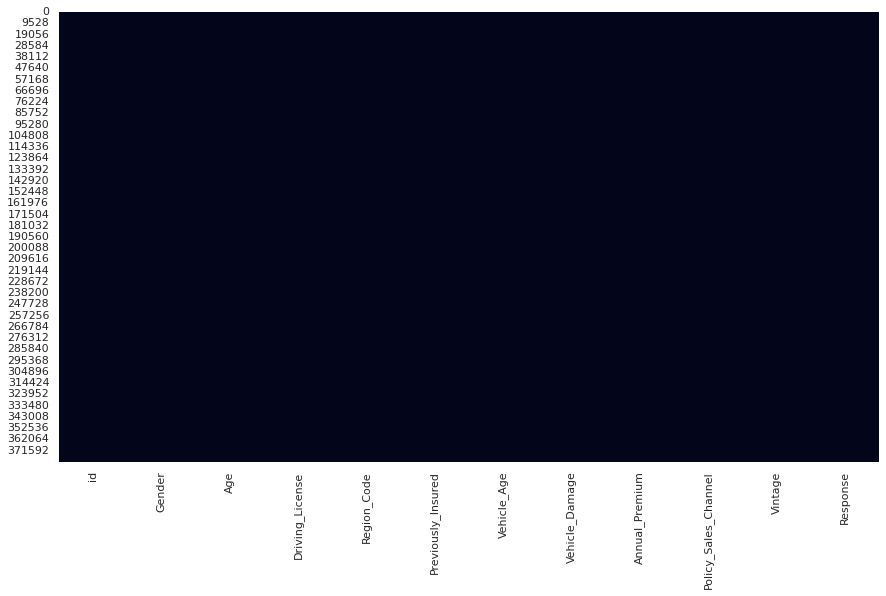

In [301]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False);

### What do we know now about the dataset?

The dataset has 381109 rows and 12 columns. It has no duplicated rows and zero null values.

Apart from the target variable, there are six other categorical variables and the rest are numeric (discrete and continuous).

## ***2. Understanding the variables***

In [302]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [303]:
# Dataset Describe
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.00,381109,381109.00,381109.00,381109.00,381109.00,381109,381109,381109.00,381109.00,381109.00,381109.00
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.00,NaN,38.82,1.00,26.39,0.46,NaN,NaN,30564.39,112.03,154.35,0.12
std,110016.84,NaN,15.51,0.05,13.23,0.50,NaN,NaN,17213.16,54.20,83.67,0.33
min,1.00,NaN,20.00,0.00,0.00,0.00,NaN,NaN,2630.00,1.00,10.00,0.00
25%,95278.00,NaN,25.00,1.00,15.00,0.00,NaN,NaN,24405.00,29.00,82.00,0.00
50%,190555.00,NaN,36.00,1.00,28.00,0.00,NaN,NaN,31669.00,133.00,154.00,0.00
75%,285832.00,NaN,49.00,1.00,35.00,1.00,NaN,NaN,39400.00,152.00,227.00,0.00


###Variables Description

**id :** Unique ID

**Gender :** Gender of the customer

**Age :** Age of the customer

**Driving_License :** Does the customer have a driving license?

**Region_Code :** Unique ID of the region of the customer

**Previously_Insured :** Did the customer previously have a vehicle insurance?

**Vehicle_Age :** Age of the customer's vehicle

**Vehicle_Damage :** Is the customer's vehicle damaged?

**Annual_Premium :** Amount customer pays as premium annually

**Policy_Sales_Channel :** Policy Sales Channel (Anonymised code)

**Vintage :** Number of days customer has been with the company

**Response :** Response (Target Variable)

### Checking number of uniques

In [304]:
# Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  id is 381109
No. of unique values in  Gender is 2
No. of unique values in  Age is 66
No. of unique values in  Driving_License is 2
No. of unique values in  Region_Code is 53
No. of unique values in  Previously_Insured is 2
No. of unique values in  Vehicle_Age is 3
No. of unique values in  Vehicle_Damage is 2
No. of unique values in  Annual_Premium is 48838
No. of unique values in  Policy_Sales_Channel is 155
No. of unique values in  Vintage is 290
No. of unique values in  Response is 2


## ***3. Data Wrangling***

In [305]:
# Dividing the datasets based on the final response
df_Response_Yes = df[df['Response']==1]
df_Response_No = df[df['Response']==0]

We dont think the dataset needs to be divided anymore or worked much upon for the EDA process. We are very happy with what we have and decided to divide the dataset only based on the final response of the customer.

## ***4. Understanding the relationships between variables using different kinds of visualisation techniques:***


####4.1 Understanding the distribution of the target variable:

In [315]:
pie_data = df.Response.value_counts(normalize=True).reset_index()
pie_data

,index,Response
0,0,0.88
1,1,0.12


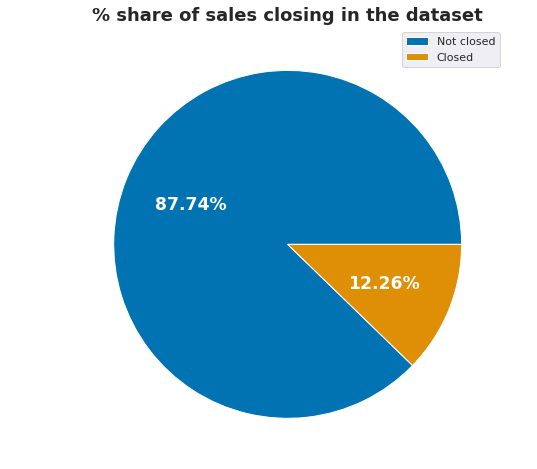

In [316]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Response'],
        labels = ['Not closed', 'Closed'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of sales closing in the dataset", fontweight = "bold", fontsize = 18)
plt.show();

We have decided to use pie chart as it is pleasing and easy to understand.

Getting the sales done is not easy regardless of how much information one can get of the customer. And so, the distribution of sales closed and not closed would be very skewed in nature.

Only 12.26% of the sales were closed by the team.

####4.2 What is the distribution of customers' previous record of vehicle insurance?

In [317]:
# Overall record of previous vehicle insurance
pie_data = df.Previously_Insured.value_counts(normalize=True).reset_index()
pie_data

,index,Previously_Insured
0,0,0.54
1,1,0.46


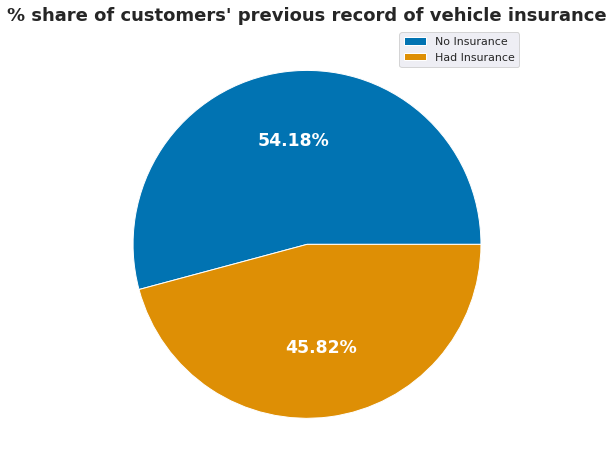

In [318]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Previously_Insured'],
        labels = ['No Insurance', 'Had Insurance'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of customers' previous record of vehicle insurance", fontweight = "bold", fontsize = 18)
plt.show();

From the data that we have of our health insurance customers, we understand that 54.18% of them do not have any record of vehicle insurance in the previous years. This certainly is a big market to try and penetrate and so campaigns that helps a user understand the benefits of having a vehicle insurance must be created.

And for those who have had vehicle insurances, it should be studied what was for them an ideal vehicle insurance. Understanding what a customer needs is as important as making awareness campaigns of your services.

In [319]:
# Record of previous vehicle insurances for customers who converted
pie_data = df_Response_Yes.Previously_Insured.value_counts().reset_index()
pie_data

,index,Previously_Insured
0,0,46552
1,1,158


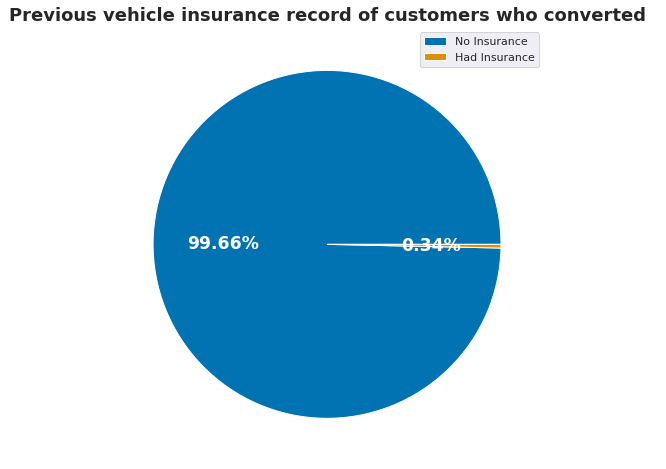

In [320]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Previously_Insured'],
        labels = ['No Insurance', 'Had Insurance'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"})
plt.legend()
# Giving our chart a suitable title
plt.title('Previous vehicle insurance record of customers who converted', fontweight = "bold", fontsize = 18)
plt.show();

Almost all the customers (99.66%) who converted, converted from the ones who never really had a vehicle insurance before.

In [321]:
# Record of previous vehicle insurances for customers who were not converted
pie_data = df_Response_No.Previously_Insured.value_counts().reset_index()
pie_data

,index,Previously_Insured
0,1,174470
1,0,159929


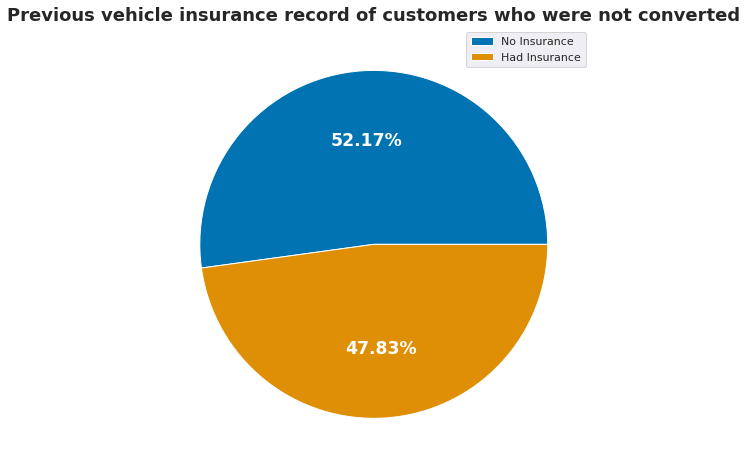

In [322]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Previously_Insured'],
        labels = ['No Insurance', 'Had Insurance'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"})
plt.legend()
# Giving our chart a suitable title
plt.title('Previous vehicle insurance record of customers who were not converted', fontweight = "bold", fontsize = 18)
plt.show();

Given how our main customer base is the one who never had a vehicle insurance, 52.17% not accepting our intial offers makes the market with still a lot more opportunities. 

####4.3 What is the gender distribution of our customers and of those who converted?

In [323]:
# Record of previous vehicle insurances for customers who converted
pie_data = df.Gender.value_counts().reset_index()
pie_data

,index,Gender
0,Male,206089
1,Female,175020


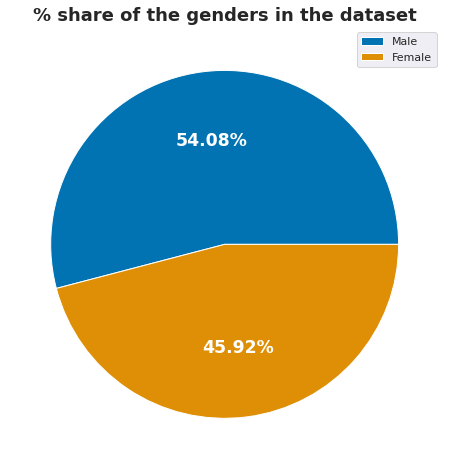

In [324]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Gender'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of the genders in the dataset", fontweight = "bold", fontsize = 18)
plt.show();

Our health insurance customers' dataset has 54.08% males and 45.92% females.

In [325]:
# Gender distribution for customers who converted
pie_data = df_Response_Yes.Gender.value_counts().reset_index()
pie_data

,index,Gender
0,Male,28525
1,Female,18185


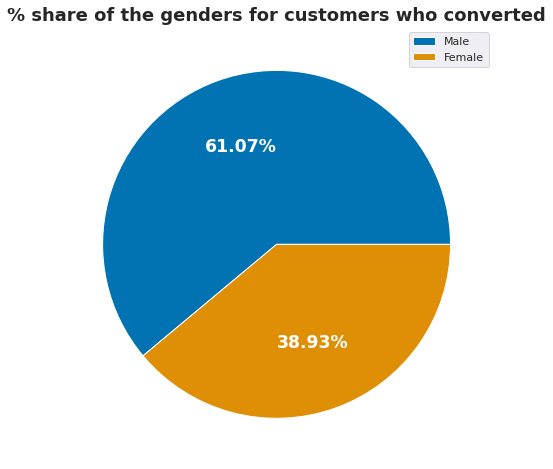

In [326]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Gender'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of the genders for customers who converted", fontweight = "bold", fontsize = 18)
plt.show();

We have not been as popular amongst our female health insurance customers when it comes to swaying them into buying our vehicle insurances as well as we would have liked to. Only 38.93% females have converted and 61.07% males have converted of the ones who converted.

In [327]:
# Gender distribution for customers who were not converted
pie_data = df_Response_No.Gender.value_counts().reset_index()
pie_data

,index,Gender
0,Male,177564
1,Female,156835


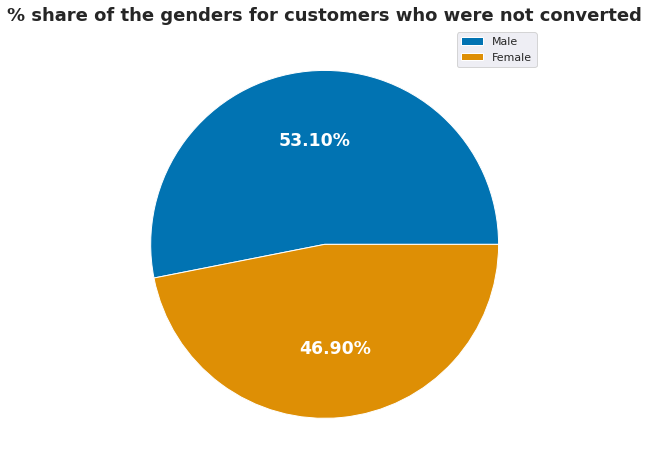

In [328]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Gender'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of the genders for customers who were not converted", fontweight = "bold", fontsize = 18)
plt.show();

Of the ones who did not convert to buy our vehicle insurances, the numbers are somewhat more consistent with what they are for the overall dataset. 53.1% males and 46.9% females didn't convert.

####4.4 What is the distribution of age of the customers?

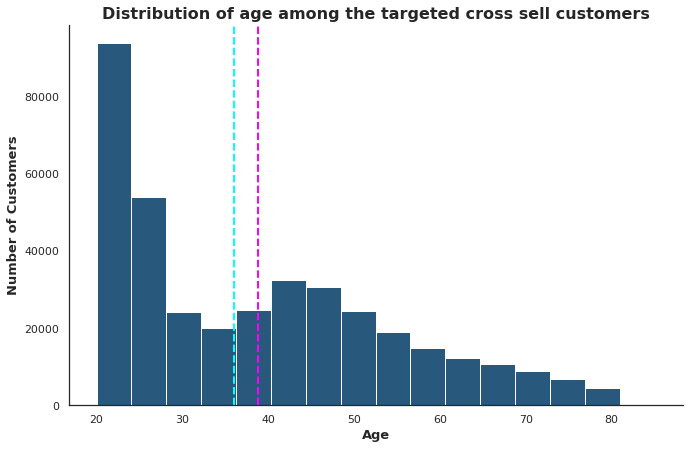

In [329]:
# Plotting a histogram
sns.set_style("white")
plt.figure(figsize = (11,7))
plt.hist(df.Age,
         bins = 16,
         color = "#28587B")
plt.axvline(df.Age.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df.Age.median(), color='cyan', linestyle='dashed', linewidth=2)   
plt.title("Distribution of age among the targeted cross sell customers", fontsize = 16, weight = "bold")
plt.xlabel("Age", fontsize = 13, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

In [330]:
print('Mean = ',df.Age.mean())
print('Median = ',df.Age.median())

Mean =  38.822583565331705
Median =  36.0


The distribution of the age of the customers is positively skewed. Its mean is somewhat close to 38.82 whereas the median is 36.

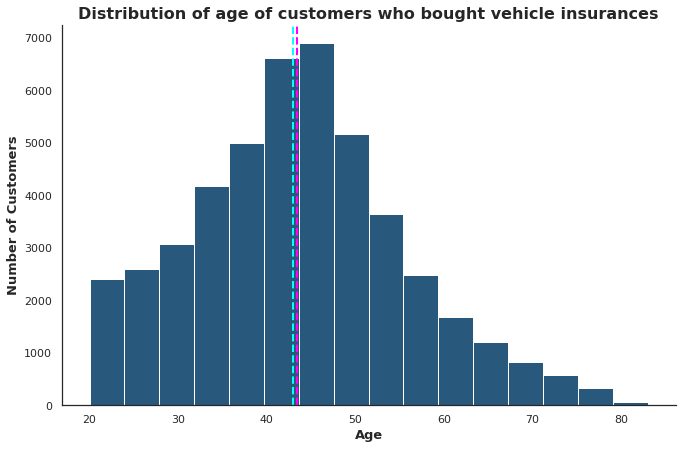

In [331]:
# Plotting a histogram
sns.set_style("white")
plt.figure(figsize = (11,7))
plt.hist(df_Response_Yes.Age,
         bins = 16,
         color = "#28587B")
plt.axvline(df_Response_Yes.Age.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_Response_Yes.Age.median(), color='cyan', linestyle='dashed', linewidth=2)   
plt.title("Distribution of age of customers who bought vehicle insurances", fontsize = 16, weight = "bold")
plt.xlabel("Age", fontsize = 13, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

In [332]:
print('Mean = ', df_Response_Yes.Age.mean())
print('Median = ', df_Response_Yes.Age.median())

Mean =  43.435559837293944
Median =  43.0


The distribution of age for the customers who responded positively is a more like Guassian distribution with mean and median both almost equal. Mean is 43.43 whereas median is 43. 

The middle-aged customers showed more interest in our vehicle insurance.

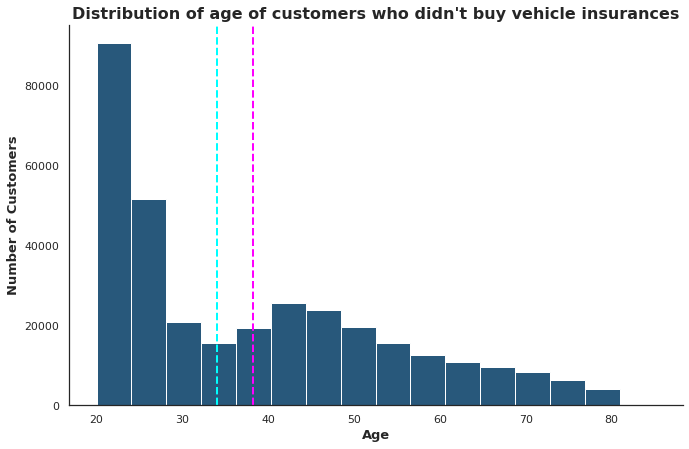

In [333]:
# Plotting a histogram
sns.set_style("white")
plt.figure(figsize = (11,7))
plt.hist(df_Response_No.Age,
         bins = 16,
         color = "#28587B")
plt.axvline(df_Response_No.Age.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_Response_No.Age.median(), color='cyan', linestyle='dashed', linewidth=2)   
plt.title("Distribution of age of customers who didn't buy vehicle insurances", fontsize = 16, weight = "bold")
plt.xlabel("Age", fontsize = 13, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

In [334]:
print('Mean = ', df_Response_No.Age.mean())
print('Median = ', df_Response_No.Age.median())

Mean =  38.17822720761725
Median =  34.0


Since the negative responses are high in number, the distribution of age in the negative responses resemble the distribution of age in the overall dataset.

The mean here is 38.17 and the median is 34.

####4.5 What is the distribution of customers with drivers license?

In [335]:
# Record of previous vehicle insurances for customers who converted
pie_data = df.Driving_License.value_counts().reset_index()
pie_data

,index,Driving_License
0,1,380297
1,0,812


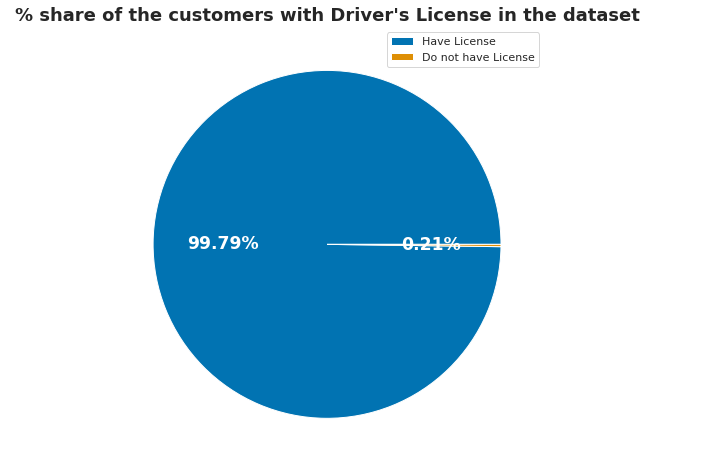

In [336]:
# Using colorblind palette for pie chart
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['Driving_License'],
        labels = ['Have License', 'Do not have License'],
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of the customers with Driver's License in the dataset", fontweight = "bold", fontsize = 18)
plt.show();

Almost everyone targeted holds a vehicle insurance, as expected. Only 0.21% of the customers targeted don't have a driving license.

####4.6 What is the distribution of the customers based on region code?

In [337]:
temp = df.groupby('Region_Code').agg({'Region_Code':'count'}).rename(columns={'Region_Code':'Total in region'}).reset_index() #Overall count for each region codes
temp

,Region_Code,Total in region
0,0.00,2021
1,1.00,1008
2,2.00,4038
3,3.00,9251
4,4.00,1801
5,5.00,1279
6,6.00,6280
7,7.00,3279
8,8.00,33877
9,9.00,3101


In [338]:
temp1 = df_Response_Yes.groupby('Region_Code').agg({'Region_Code':'count'}).rename(columns = {'Region_Code':'Total Yes'}).reset_index() #Count of Yes in each region
temp1

,Region_Code,Total Yes
0,0.00,174
1,1.00,109
2,2.00,287
3,3.00,1181
4,4.00,285
5,5.00,148
6,6.00,439
7,7.00,432
8,8.00,3257
9,9.00,253


In [339]:
temp2 = df_Response_No.groupby('Region_Code').agg({'Region_Code':'count'}).rename(columns = {'Region_Code':'Total No'}).reset_index() #Count of No in each region
temp2

,Region_Code,Total No
0,0.00,1847
1,1.00,899
2,2.00,3751
3,3.00,8070
4,4.00,1516
5,5.00,1131
6,6.00,5841
7,7.00,2847
8,8.00,30620
9,9.00,2848


In [340]:
bar_data = pd.merge(left = temp, right = temp1, on = 'Region_Code') #Merging the first two dataframes
bar_data = pd.merge(left = bar_data, right = temp2, on = 'Region_Code') #Merging the merged dataframe with the last dataframe
bar_data = bar_data.sort_values(by = 'Total in region', ascending = False)
bar_data

,Region_Code,Total in region,Total Yes,Total No
28,28.00,106415,19917,86498
8,8.00,33877,3257,30620
46,46.00,19749,2032,17717
41,41.00,18263,2224,16039
15,15.00,13308,958,12350
30,30.00,12191,900,11291
29,29.00,11065,1365,9700
50,50.00,10243,642,9601
3,3.00,9251,1181,8070
11,11.00,9232,1041,8191


In [341]:
bar_data = bar_data.iloc[:10,:] #Selecting the data for top 10 regions
bar_data

,Region_Code,Total in region,Total Yes,Total No
28,28.00,106415,19917,86498
8,8.00,33877,3257,30620
46,46.00,19749,2032,17717
41,41.00,18263,2224,16039
15,15.00,13308,958,12350
30,30.00,12191,900,11291
29,29.00,11065,1365,9700
50,50.00,10243,642,9601
3,3.00,9251,1181,8070
11,11.00,9232,1041,8191


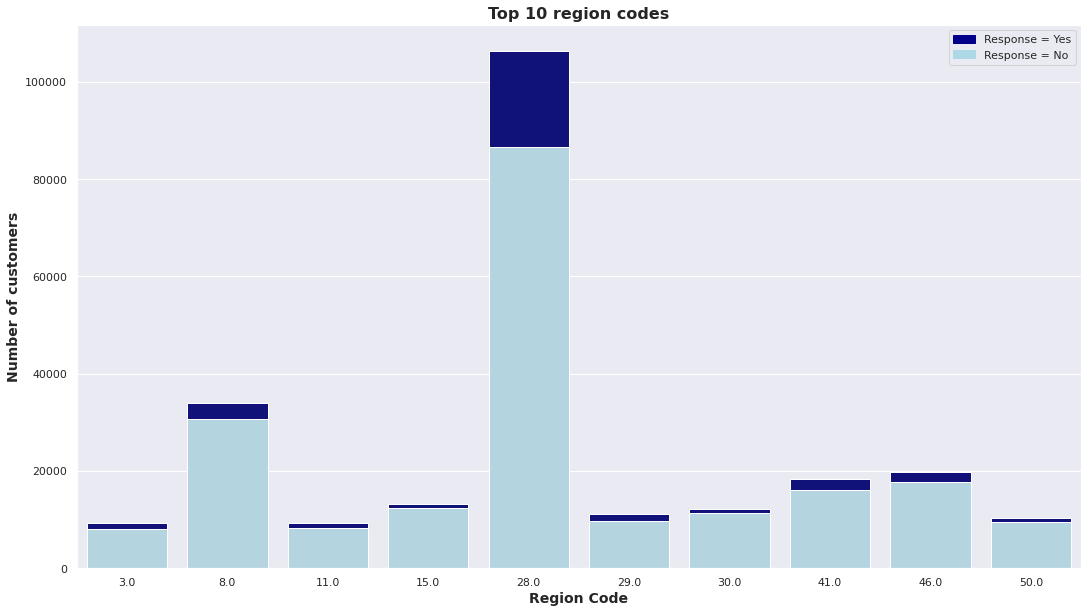

In [342]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,10))
bar1 = sns.barplot(x="Region_Code",  y="Total in region", data=bar_data, color='darkblue')
bar2 = sns.barplot(x="Region_Code",  y="Total No", data=bar_data, ci=None, color='lightblue')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Response = Yes')
bottom_bar = mpatches.Patch(color='lightblue', label='Response = No')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Region Code', fontsize = 14, weight = "bold")
plt.ylabel('Number of customers', fontsize = 14, weight = "bold")
plt.title('Top 10 region codes', fontsize = 16, weight = "bold")
# show the graph
plt.show();

Region with code 28 has the most customers and perhaps the highest percentage of success in terms of cross selling. Overall a very small percentage of customers from the regions with most population buy our vehicle insurances.

It should be studied how we achieved huge success in Region 28 and perhaps implemented what worked there in the other regions.

####4.7 What is the distribution of vehicle age of our customers?

In [343]:
bar_data = df.Vehicle_Age.value_counts(normalize=True).reset_index()
bar_data

,index,Vehicle_Age
0,1-2 Year,0.53
1,< 1 Year,0.43
2,> 2 Years,0.04


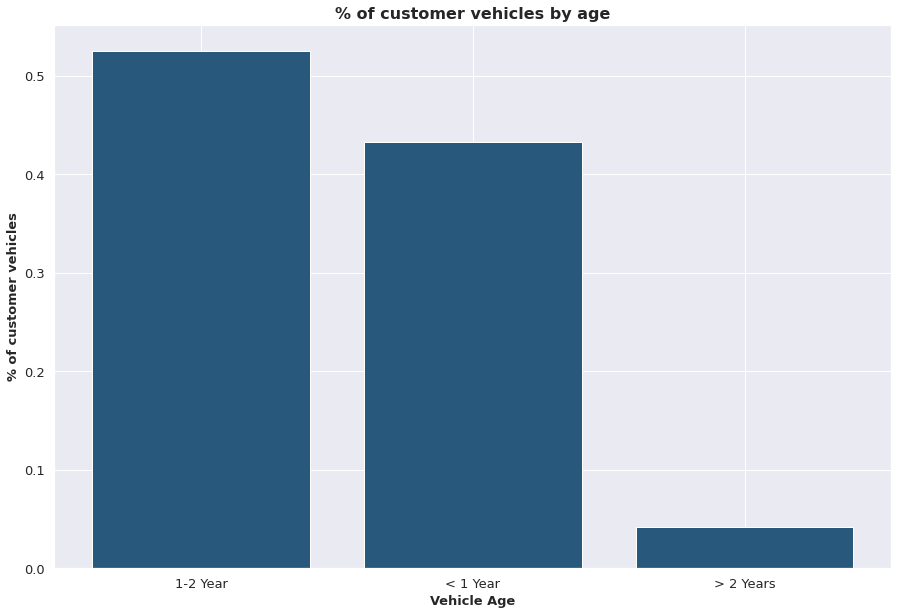

In [344]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Age'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer vehicles by age', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

There are not many vehicles very old, with only 4% older than 2 years. And more than half of the customers (53%) have vehicles between the age of 1 and 2 years. Rest 43% have vehicles lesser than a year old.

In [345]:
bar_data = df_Response_Yes.Vehicle_Age.value_counts(normalize=True).reset_index()
bar_data

,index,Vehicle_Age
0,1-2 Year,0.75
1,< 1 Year,0.15
2,> 2 Years,0.10


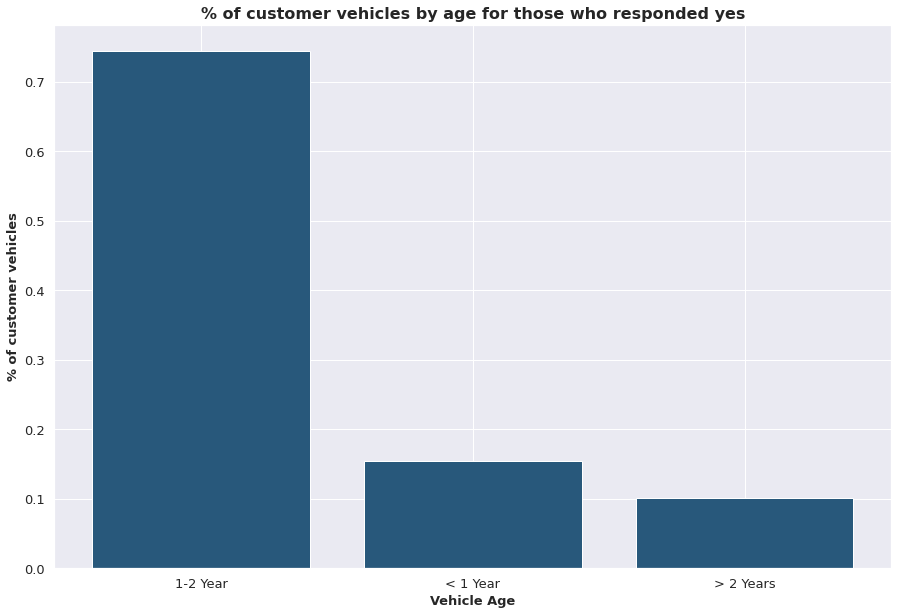

In [346]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Age'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer vehicles by age for those who responded yes', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

Customers with vehicles of age between 1 and 2 years have showed the most interest in our insurance. 3/4th of the customers who responded yes belong to this category. 

In [347]:
bar_data = df_Response_No.Vehicle_Age.value_counts(normalize=True).reset_index()
bar_data

,index,Vehicle_Age
0,1-2 Year,0.49
1,< 1 Year,0.47
2,> 2 Years,0.03


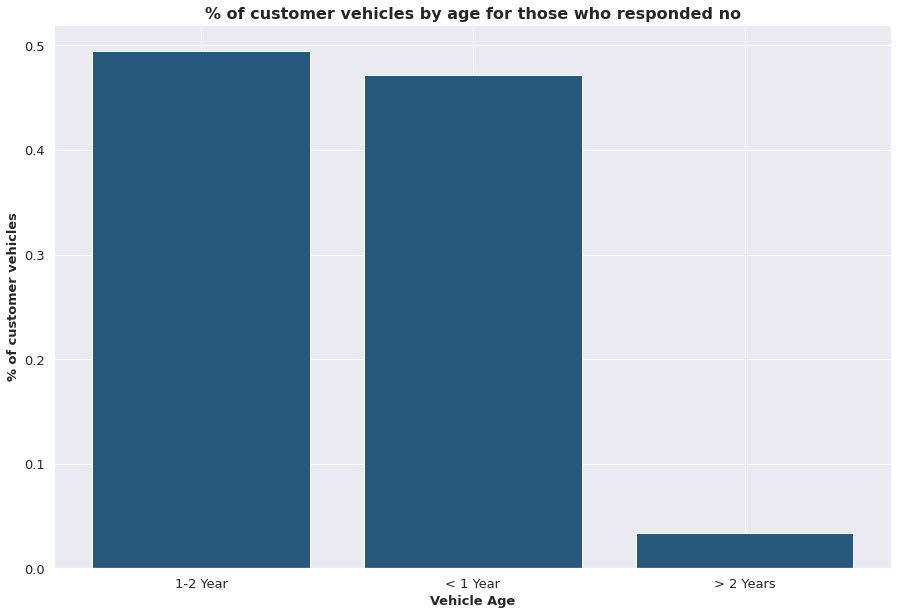

In [348]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Age'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer vehicles by age for those who responded no', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

The share of the customers who responded no grows for those who have vehicles of age less than a year. It is perhaps they already have an existing vehicle insurance.

####4.8 Understanding the Vehicle Damage distribution for the customers

In [349]:
bar_data = df.Vehicle_Damage.value_counts(normalize=True).reset_index()
bar_data

,index,Vehicle_Damage
0,Yes,0.50
1,No,0.50


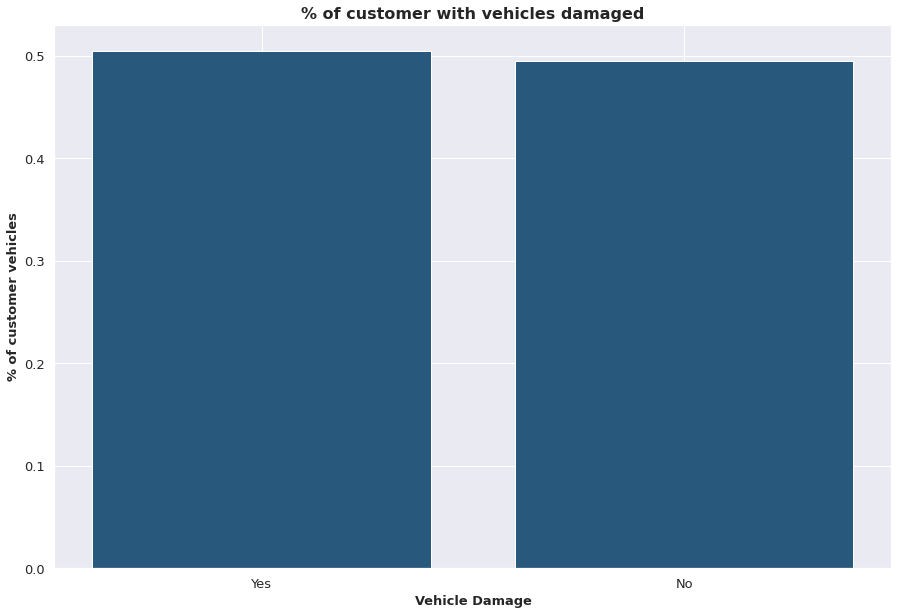

In [350]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Damage'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer with vehicles damaged', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Damage', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

The distribution of customers with damaged vehicles and customers without is almost equal.

In [351]:
bar_data = df_Response_Yes.Vehicle_Damage.value_counts(normalize=True).reset_index()
bar_data

,index,Vehicle_Damage
0,Yes,0.98
1,No,0.02


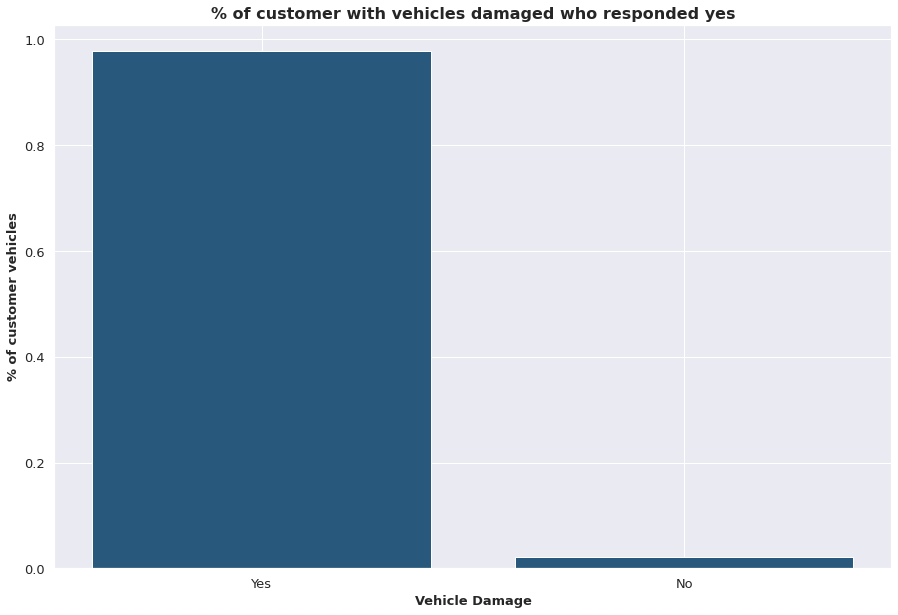

In [352]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Damage'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer with vehicles damaged who responded yes', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Damage', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

Almost all of the customers who responded yes to buying our vehicle insurance have damaged vehicle. Only 2% don't.

In [353]:
bar_data = df_Response_No.Vehicle_Damage.value_counts(normalize=True).reset_index()
bar_data

,index,Vehicle_Damage
0,No,0.56
1,Yes,0.44


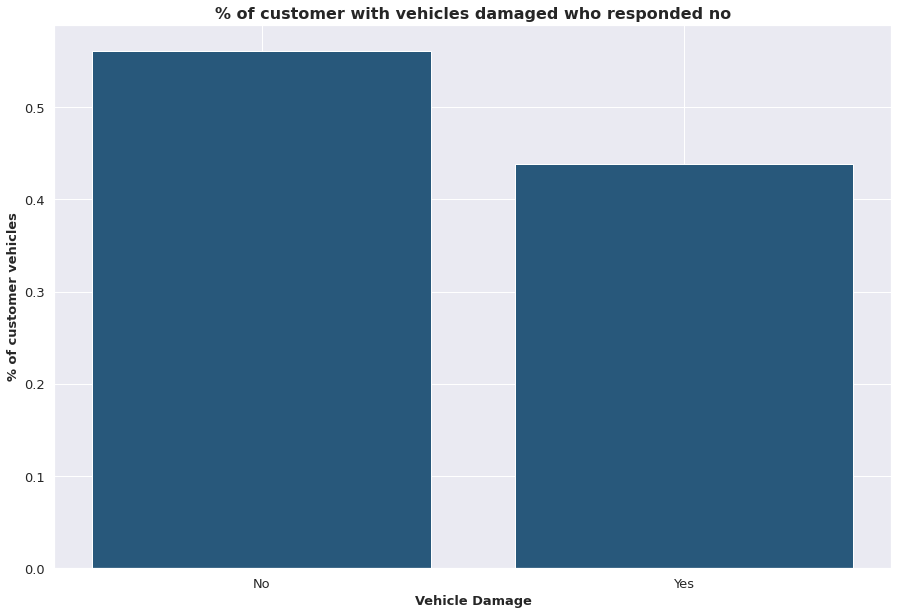

In [354]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['index'], 
        height = bar_data['Vehicle_Damage'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('% of customer with vehicles damaged who responded no', fontsize = 16, fontweight = 'bold')
plt.xlabel('Vehicle Damage', fontsize = 13, fontweight = 'bold')
plt.ylabel('% of customer vehicles', fontsize = 13, fontweight = 'bold')
plt.show();

56% of customers who responded no didn't have damaged vehicles. 

####4.9 Understanding the distribution of Annual Premiums paid by the customer

In [355]:
# Preparing the data
temp = pd.concat([df['Annual_Premium'].describe(),df_Response_Yes['Annual_Premium'].describe(),df_Response_No['Annual_Premium'].describe()], axis=1)
temp.reset_index(inplace=True)
temp.columns = ['stat','Overall','Responded_Yes','Responded_No']
# Not including the distribution post 75% since two of the three room types have high volume of outliers
line_data = temp.iloc[3:7,:] 
line_data

,stat,Overall,Responded_Yes,Responded_No
3,min,2630.00,2630.00,2630.00
4,25%,24405.00,24868.00,24351.00
5,50%,31669.00,33002.00,31504.00
6,75%,39400.00,41297.00,39120.00


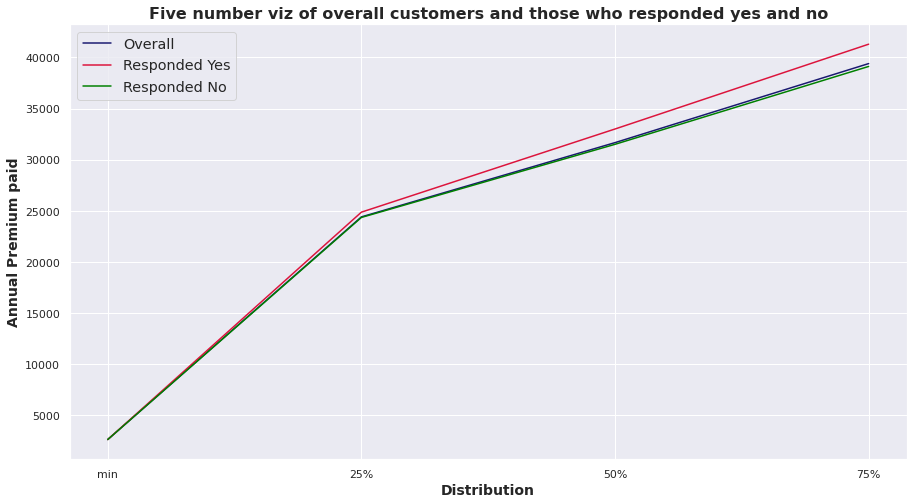

In [356]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data.stat, line_data.Overall, color = "midnightblue")
plt.plot(line_data.stat, line_data.Responded_Yes, color = "crimson")
plt.plot(line_data.stat, line_data.Responded_No, color = "green")
# Assigning the labels
plt.ylabel("Annual Premium paid", fontsize = 14, fontweight = "bold")
plt.xlabel("Distribution", fontsize = 14, fontweight = "bold")
# Adding labels
labels = ['Overall','Responded Yes','Responded No']
plt.legend(labels = labels, fontsize = "large")
plt.title("Five number viz of overall customers and those who responded yes and no", fontsize = 16, fontweight = "bold")
plt.show();

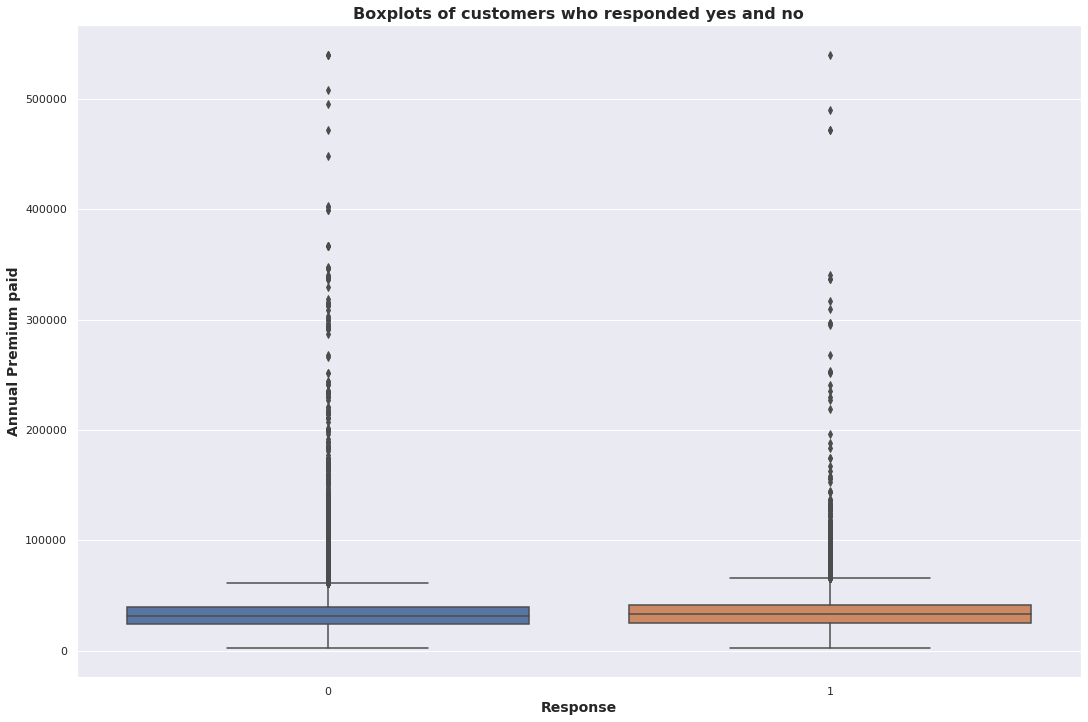

In [357]:
# Plotting the boxplots for the two kinds
sns.set(style="darkgrid")
plt.figure(figsize = (18,12))
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.ylabel("Annual Premium paid", fontsize = 14, fontweight = "bold")
plt.xlabel("Response", fontsize = 14, fontweight = "bold")
plt.title("Boxplots of customers who responded yes and no", fontsize = 16, fontweight = "bold")
plt.show();

The two types of customers (ones who responded yes and ones who responded no) seem to have similar distribution of their Annual Premium. The distribution is slightly higher for those who responded yes, but the difference is too little to seem significant for the 40-50 percentiles of the customers.

####4.10 Which are the top 10 Policy Channel Sales?

In [358]:
temp = df.groupby('Policy_Sales_Channel').agg({'Policy_Sales_Channel':'count'}).rename(columns={'Policy_Sales_Channel':'Total'}).reset_index() #Overall count for each policy sales
temp

,Policy_Sales_Channel,Total
0,1.00,1074
1,2.00,4
2,3.00,523
3,4.00,509
4,6.00,3
...,...,...
150,157.00,6684
151,158.00,492
152,159.00,51
153,160.00,21779


In [359]:
temp1 = df_Response_Yes.groupby('Policy_Sales_Channel').agg({'Policy_Sales_Channel':'count'}).rename(columns = {'Policy_Sales_Channel':'Total Yes'}).reset_index() #Count of Yes for each policy sales channel
temp1

,Policy_Sales_Channel,Total Yes
0,1.00,35
1,2.00,1
2,3.00,159
3,4.00,102
4,7.00,182
...,...,...
116,157.00,1794
117,158.00,135
118,159.00,1
119,160.00,475


In [360]:
temp2 = df_Response_No.groupby('Policy_Sales_Channel').agg({'Policy_Sales_Channel':'count'}).rename(columns = {'Policy_Sales_Channel':'Total No'}).reset_index() #Count of No for each policy sales channel
temp2

,Policy_Sales_Channel,Total No
0,1.00,1039
1,2.00,3
2,3.00,364
3,4.00,407
4,6.00,3
...,...,...
148,157.00,4890
149,158.00,357
150,159.00,50
151,160.00,21304


In [361]:
bar_data = pd.merge(left = temp, right = temp1, on = 'Policy_Sales_Channel') #Merging the first two dataframes
bar_data = pd.merge(left = bar_data, right = temp2, on = 'Policy_Sales_Channel') #Merging the merged dataframe with the last dataframe
bar_data = bar_data.sort_values(by = 'Total', ascending = False)
bar_data

,Policy_Sales_Channel,Total,Total Yes,Total No
109,152.00,134784,3858,130926
23,26.00,79700,15891,63809
90,124.00,73995,13996,59999
117,160.00,21779,475,21304
113,156.00,10661,2297,8364
...,...,...,...,...
47,57.00,5,1,4
1,2.00,4,1,3
57,68.00,4,1,3
25,28.00,3,1,2


In [362]:
bar_data = bar_data.iloc[:10,:] #Selecting the data for top 10 policy sales channel
bar_data

,Policy_Sales_Channel,Total,Total Yes,Total No
109,152.00,134784,3858,130926
23,26.00,79700,15891,63809
90,124.00,73995,13996,59999
117,160.00,21779,475,21304
113,156.00,10661,2297,8364
89,122.00,9930,1720,8210
114,157.00,6684,1794,4890
111,154.00,5993,1474,4519
108,151.00,3885,122,3763
118,163.00,2893,880,2013


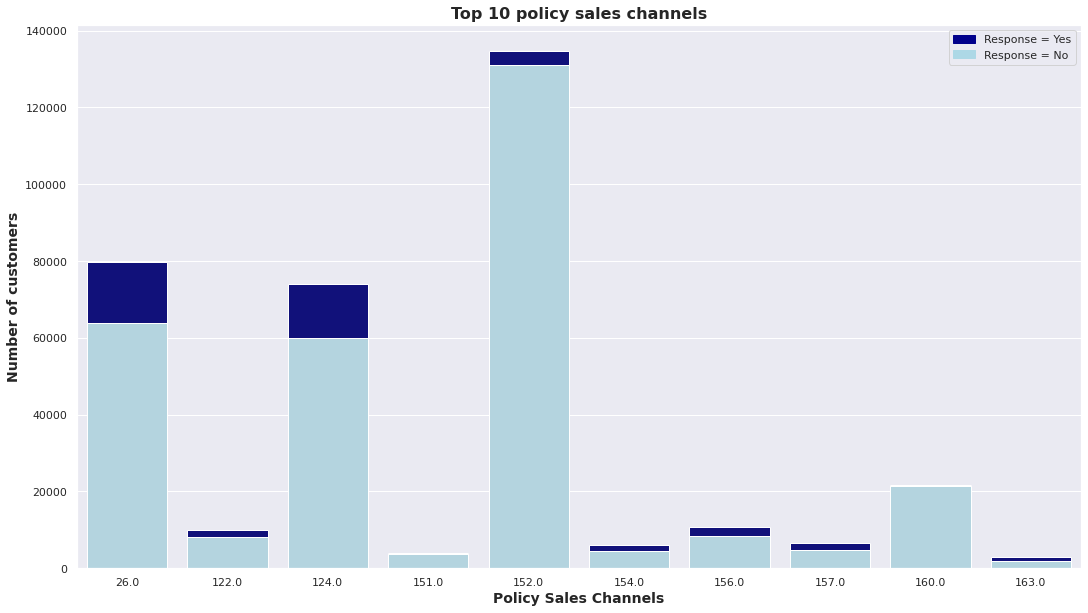

In [363]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,10))
bar1 = sns.barplot(x="Policy_Sales_Channel",  y="Total", data=bar_data, color='darkblue')
bar2 = sns.barplot(x="Policy_Sales_Channel",  y="Total No", data=bar_data, ci=None, color='lightblue')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Response = Yes')
bottom_bar = mpatches.Patch(color='lightblue', label='Response = No')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Policy Sales Channels', fontsize = 14, weight = "bold")
plt.ylabel('Number of customers', fontsize = 14, weight = "bold")
plt.title('Top 10 policy sales channels', fontsize = 16, weight = "bold")
# show the graph
plt.show();

Policy Sales Channels 26.0 and 124.0 are working way better than the others whereas the policy sales channels 152 and 160 are resources wasted with very limited or no return at all.

It is advisable to focus the resources more on channels that do well.

####4.11 What is the distribution of Vintage?

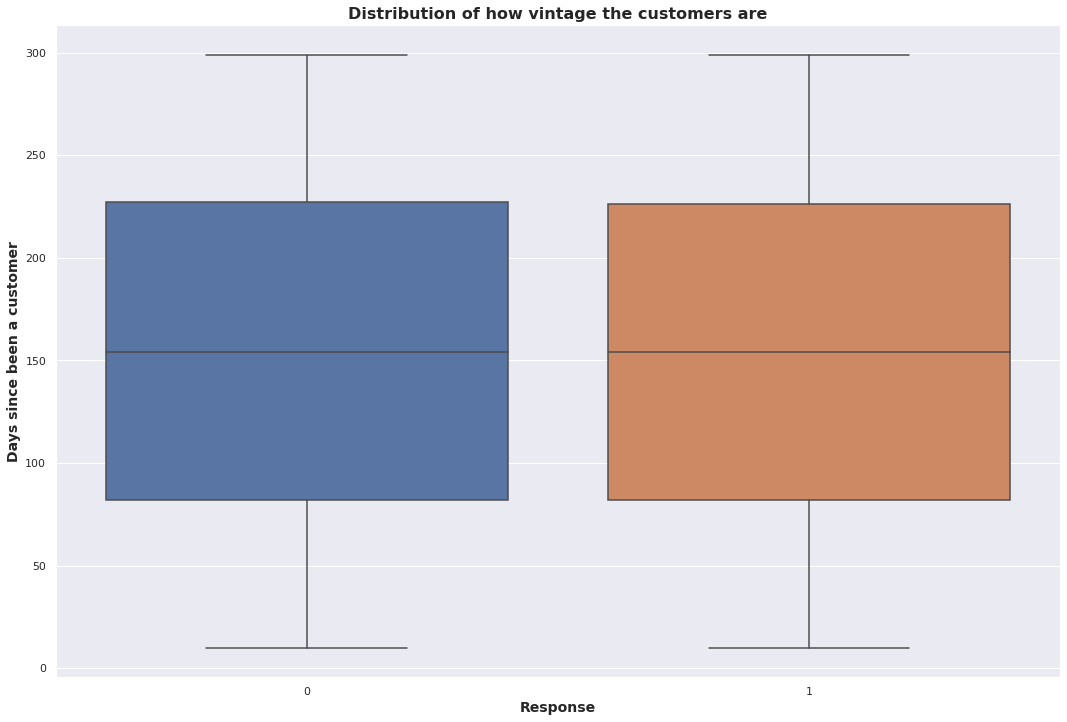

In [364]:
# Plotting the boxplots for the two kinds
sns.set(style="darkgrid")
plt.figure(figsize = (18,12))
sns.boxplot(x='Response', y='Vintage', data=df)
plt.ylabel("Days since been a customer", fontsize = 14, fontweight = "bold")
plt.xlabel("Response", fontsize = 14, fontweight = "bold")
plt.title('Distribution of how vintage the customers are', fontsize = 16, fontweight = "bold")
plt.show();

The distribution of the customer's age with the company is same for both the types - ones who bought the vehicle insurance and ones who didn't.

####4.12 Correlation Heatmap

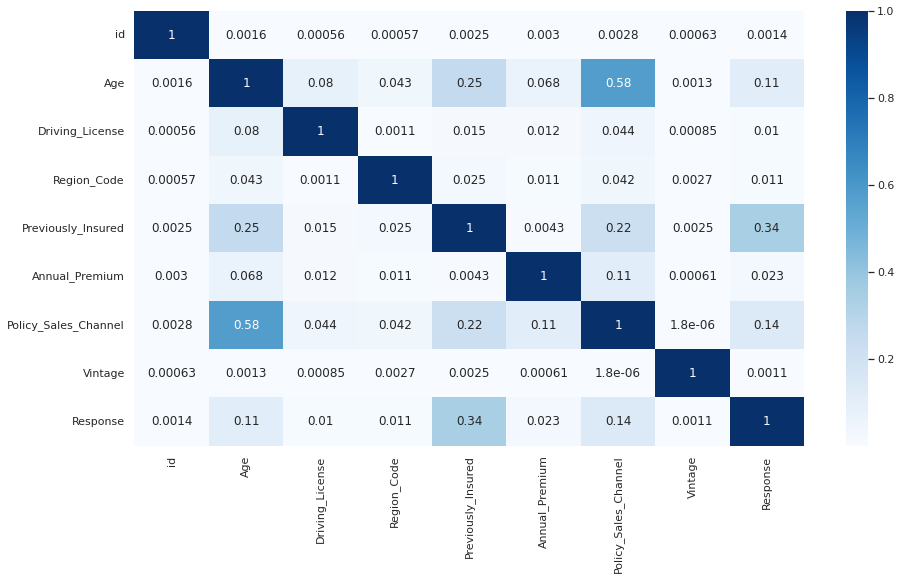

In [365]:
# Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Blues')
plt.show();

No two numerical columns are showing any kind of linear relationship from the correlation heatmap.

####4.13 The distributions of all numeric columns and scatter plots:

In [366]:
# The numerical columns
numeric_features = ['Age', 'Annual_Premium', 'Vintage']

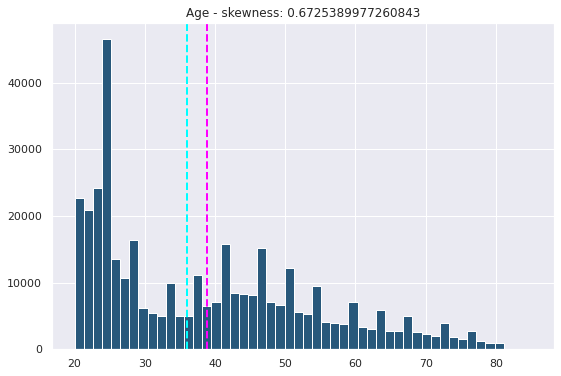

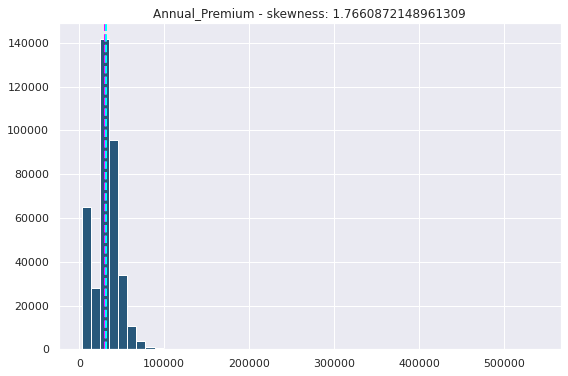

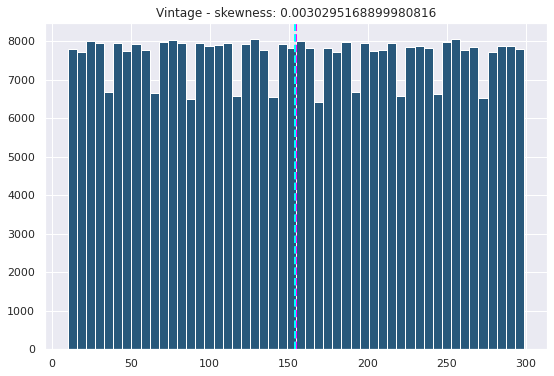

In [367]:
# plot a bar plot for each numerical feature count
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax, color = '#28587B')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col + ' - skewness: ' + str(df[col].skew()))
plt.show();

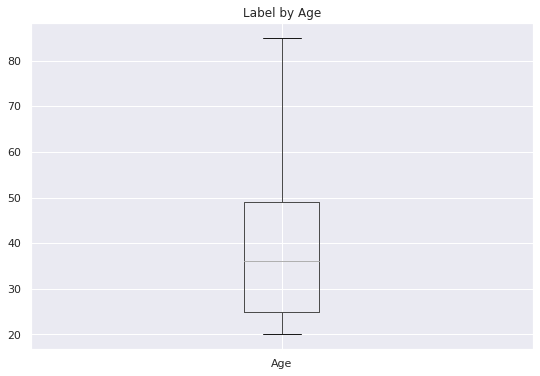

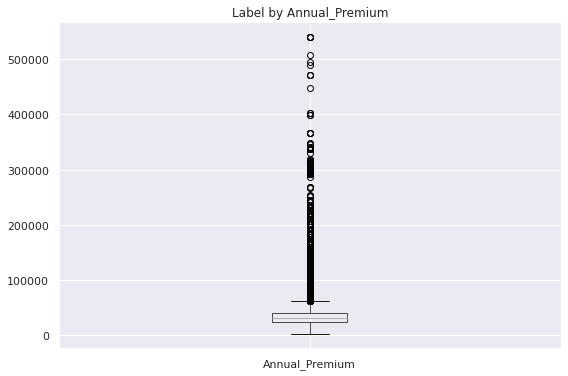

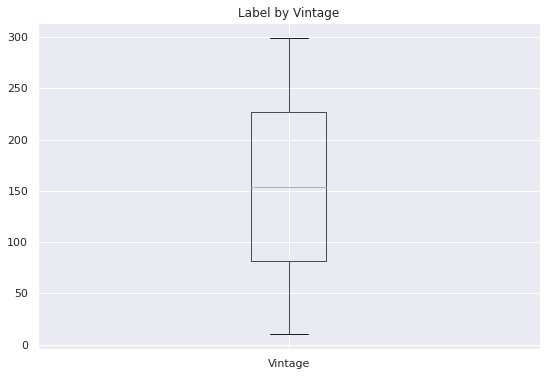

In [368]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    dataset.boxplot(col, ax = ax)
    ax.set_title('Label by ' + col)
plt.show();

None of the numerical columns have a symmetric Gaussian-like distribution. And Annual_Premium feature has a lot of outliers.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [369]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


No missing values in the dataset.

####2. Handling outliers

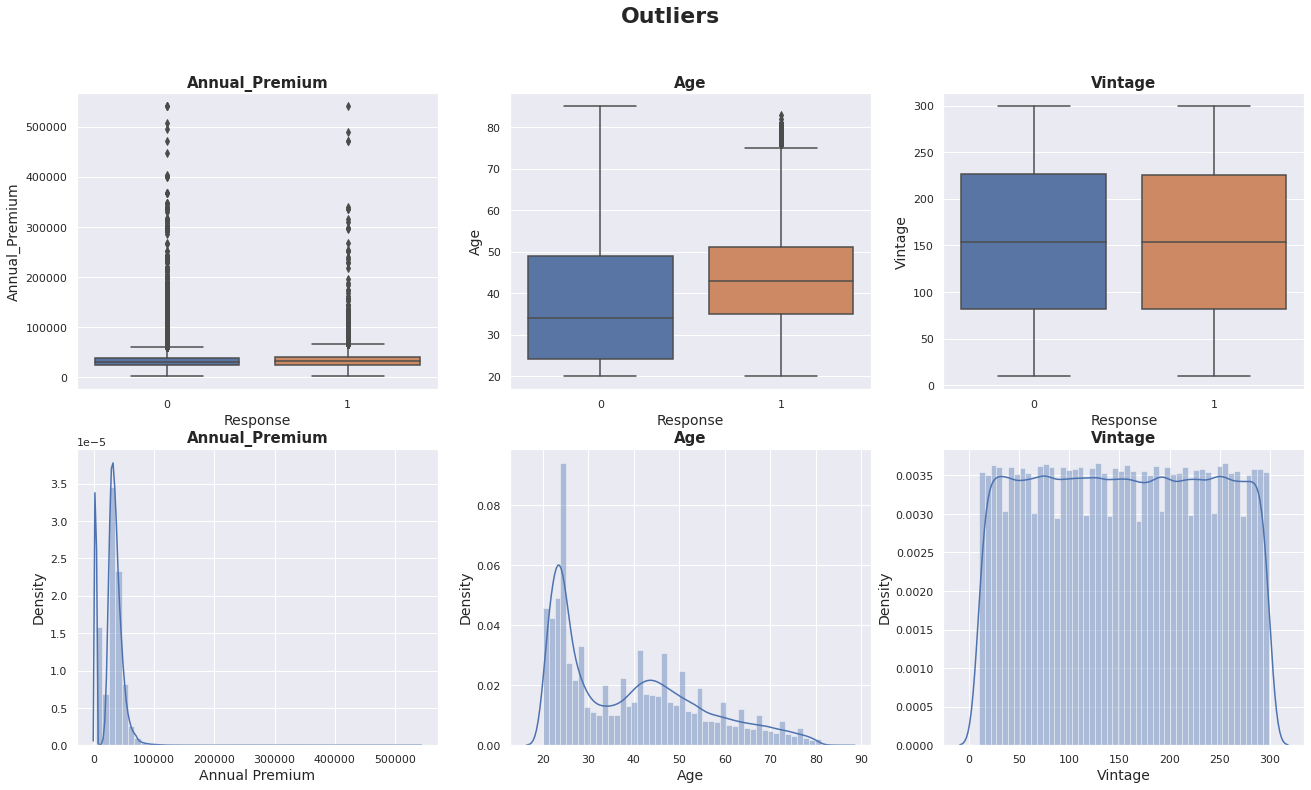

In [370]:
#Finding outliers
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(df)

*   From the above plot it can be implied that **Annual Premium** has a poitively skewed distribution.
*   From above we can also depict that **Vintage** has a approximatly uniform distribution.
* **Age** columns has some outliers but we are not going to treat them because it won't be affecting our result.


In [371]:
#For Outlier treatment we will be applying quantile method.
#For feature Scaling we will be using MinMaxScaler technique for Normlization.
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(df)
scale_features(df)

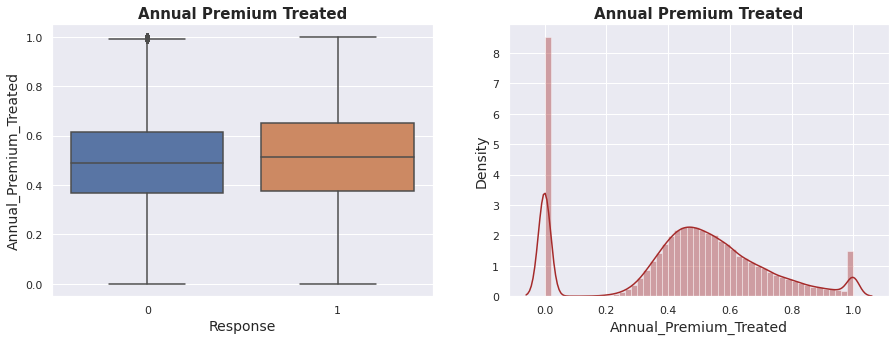

In [372]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(df)

*   From the above plots we can see that there are no more outliers in *Annual Premium*.

####3. Categorical Encoding

In [373]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated
0,1,Male,44,1,28.00,0,> 2 Years,Yes,40454.00,26.00,217,1,0.64,0.72
1,2,Male,76,1,3.00,0,1-2 Year,No,33536.00,26.00,183,0,0.52,0.60
2,3,Male,47,1,28.00,0,> 2 Years,Yes,38294.00,26.00,27,1,0.60,0.06
3,4,Male,21,1,11.00,1,< 1 Year,No,28619.00,152.00,203,0,0.44,0.67
4,5,Female,29,1,41.00,1,< 1 Year,No,27496.00,152.00,39,0,0.42,0.10


In [374]:
def convert_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

    # Categorizing Policy_Sales_Channel feature
    x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D') 
    res = dict(zip(x.keys(),x.values))
    df['Policy_Sales_Channel_Categorical'] = df['Policy_Sales_Channel'].map(res) 

    # Categorizing Region Code feature
    x = df['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
    res = dict(zip(x.keys(),x.values))
    df['Region_Code_Categorical'] = df['Region_Code'].map(res) 
    # df.Region_Code_Categorical.value_counts()

convert_numerical_to_categorical(df)

In [375]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated,Age_Group,Policy_Sales_Channel_Categorical,Region_Code_Categorical
0,1,Male,44,1,28.00,0,> 2 Years,Yes,40454.00,26.00,217,1,0.64,0.72,YoungAge,Channel_B,Region_A
1,2,Male,76,1,3.00,0,1-2 Year,No,33536.00,26.00,183,0,0.52,0.60,OldAge,Channel_B,Region_C
2,3,Male,47,1,28.00,0,> 2 Years,Yes,38294.00,26.00,27,1,0.60,0.06,MiddleAge,Channel_B,Region_A
3,4,Male,21,1,11.00,1,< 1 Year,No,28619.00,152.00,203,0,0.44,0.67,YoungAge,Channel_A,Region_C
4,5,Female,29,1,41.00,1,< 1 Year,No,27496.00,152.00,39,0,0.42,0.10,YoungAge,Channel_A,Region_B


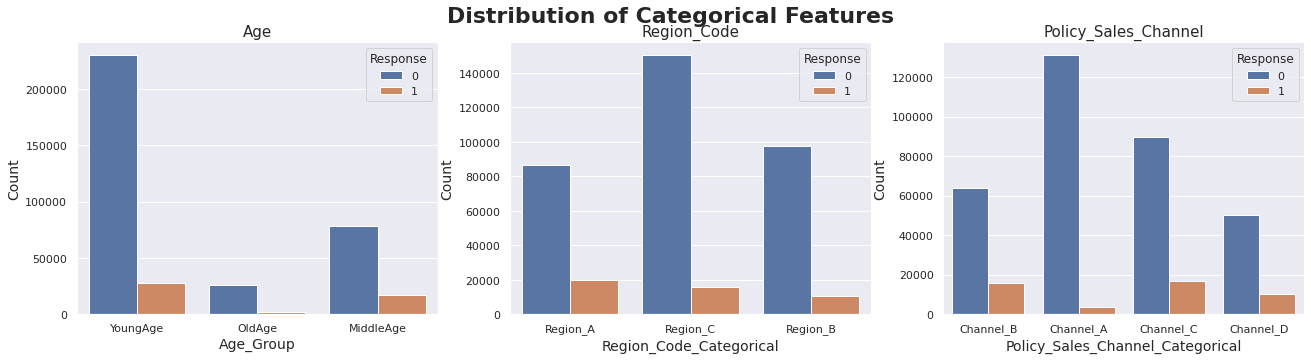

In [376]:
def show_distribution_num_to_cat(df):    
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )

show_distribution_num_to_cat(df)

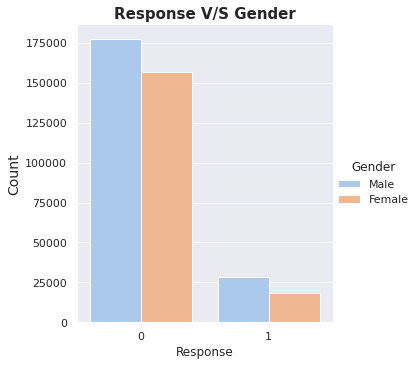

In [377]:
def show_gender_response_relation(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette="pastel",
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
show_gender_response_relation(df)

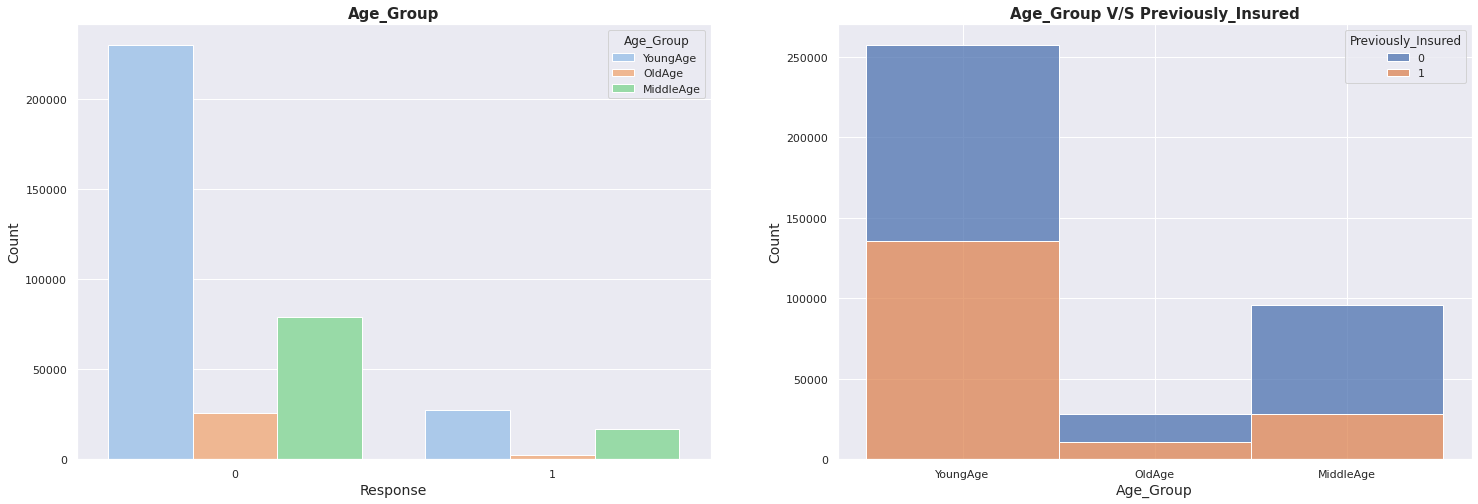

In [378]:
def show_age_relations(df):
    fig, axes = plt.subplots(1,2, figsize=(25,8))
    sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="pastel",
            data=df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group", 
                 hue="Previously_Insured", data=df, 
                 stat="count", multiple="stack")
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
show_age_relations(df)

####4. Categorical Feature

Let's see the feature importance of categorical features.

In [389]:
categorical_features = ['Gender','Age_Group','Region_Code_Categorical','Previously_Insured',
                        'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel_Categorical']

In [379]:
def make_features_numeric(df):
    global numeric_df
    numeric_df = df.copy()
    numeric_df['Gender'] = numeric_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    numeric_df['Age_Group'] = numeric_df['Age_Group'].apply(lambda x: 1 if x == 'YoungAge' else 2 if x == 'MiddleAge' else 3)
    numeric_df['Vehicle_Age'] = numeric_df['Vehicle_Age'].apply(lambda x: 1 if x == '1-2 Year' else 2 if x == '> 2 Years' else 0)
    numeric_df['Vehicle_Damage'] = numeric_df['Vehicle_Damage'].apply(lambda x: 0 if x == 'Y' else 1)
    numeric_df['Policy_Sales_Channel_Categorical'] = numeric_df['Policy_Sales_Channel_Categorical'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3 if x=='C' else 4)
    numeric_df['Region_Code_Categorical'] = numeric_df['Region_Code_Categorical'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3)

make_features_numeric(df)

####5. Numerical Feature

Let's see the Kendall's correlation between numerical features.

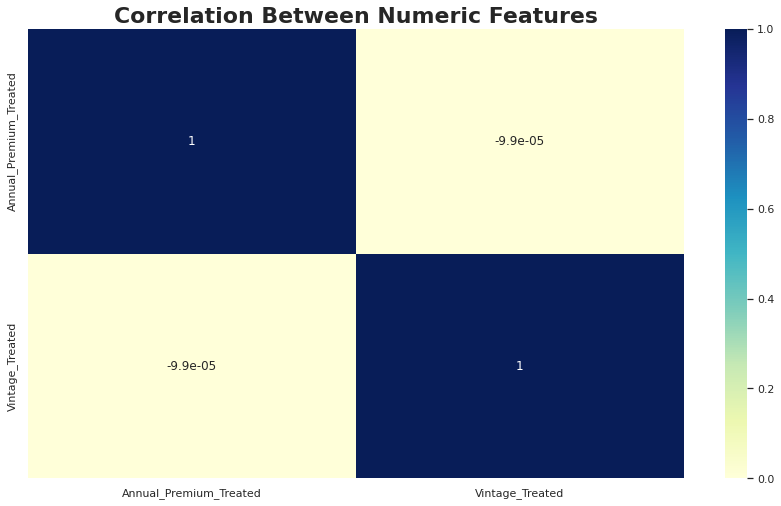

In [380]:
def numeric_feature_selection(df):
    plt.rcParams['figure.figsize'] = 14.7,8.27
    numeric_features = ['Annual_Premium_Treated','Vintage_Treated']

    sns.heatmap(df[numeric_features].corr(method = 'kendall'),
                cmap="YlGnBu",annot=True)
    plt.title('Correlation Between Numeric Features', fontdict={'fontsize':22,'fontweight':'bold'})
    
numeric_feature_selection(df)

We have got two numeric features - Annual_Premium_Treated and Vintage_Treated

*   There is no correlation between these two features, as a result we are going to move forward with both of them. 


####6. Mutual Information

Mutual information is one of many quantities that measures how much one random variables tells us about another.

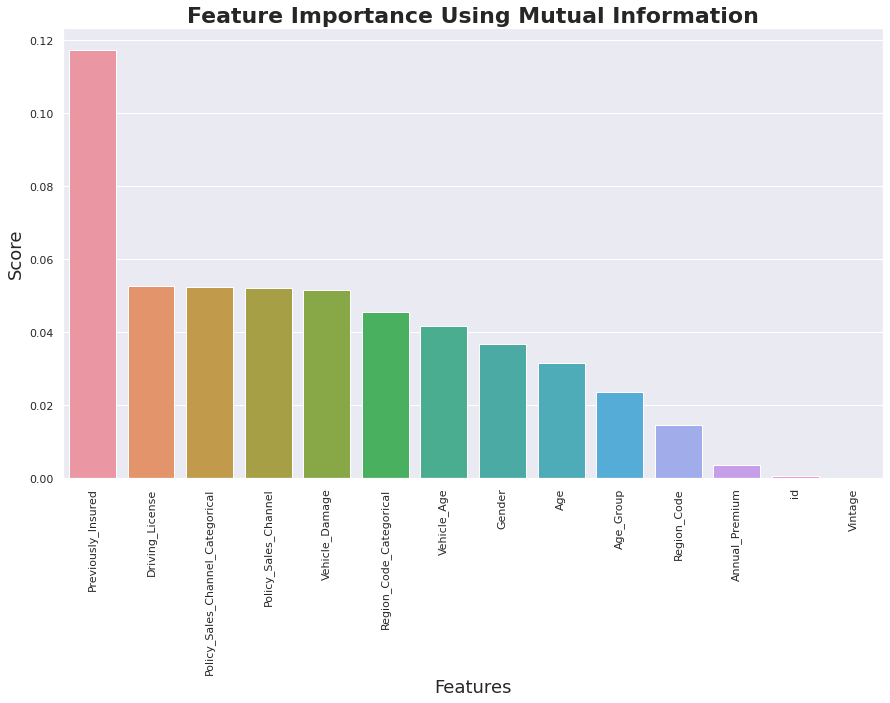

In [381]:
def mutual_info(df):
    X = df.copy()
    y = X.pop("Response")
    X.drop(columns = ['Annual_Premium_Treated','Vintage_Treated'], inplace = True)
    
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

    high_score_features = []
    feature_scores = mutual_info_classif( x_train, y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(numeric_df)

- From the above bar plot, we can conclude Previously_Insured is the most important feature and has the highest impact on dependent feature.

####7. One hot Encoding

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

When there is not a ordinal relationship between variables, we use One-Hot Encoding. With One-Hot Encoding the model doesn't assume a natural ordering between categories which may result in poor performance or unexpected results.

In [382]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Vintage_Treated', 'Age_Group', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical'],
      dtype='object')

In [383]:
cols_to_encode = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
                  'Age_Group','Policy_Sales_Channel_Categorical', 'Region_Code_Categorical']

df = pd.get_dummies(data = df, columns=cols_to_encode)
df.head()

,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated,...,Age_Group_MiddleAge,Age_Group_OldAge,Age_Group_YoungAge,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
0,1,44,1,28.00,40454.00,26.00,217,1,0.64,0.72,...,0,0,1,0,1,0,0,1,0,0
1,2,76,1,3.00,33536.00,26.00,183,0,0.52,0.60,...,0,1,0,0,1,0,0,0,0,1
2,3,47,1,28.00,38294.00,26.00,27,1,0.60,0.06,...,1,0,0,0,1,0,0,1,0,0
3,4,21,1,11.00,28619.00,152.00,203,0,0.44,0.67,...,0,0,1,1,0,0,0,0,0,1
4,5,29,1,41.00,27496.00,152.00,39,0,0.42,0.10,...,0,0,1,1,0,0,0,0,1,0


We dummy encoded (one-hot encoded) the Gender, Age Group, Vehicle age, Vehicale Damage, Region Code and Policy Sales Channels.


*So, here we are done with the Feature Selection part of our dataset. Let's train the dataset on different Machine Learning Algorithms.*

####8. Droping extra Columns

- As we have already categorized 'Age', 'Region_Code', 'Annual_Premium',
'Policy_Sales_Channel', 'Vintage' features in our data set so we can now drop these features.
- We can also drop 'ID' and 'Driving_License' as they are not providing any valuable information.

In [386]:
df.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Vintage_Treated', 'Gender_Female', 'Gender_Male',
       'Previously_Insured_0', 'Previously_Insured_1', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes', 'Age_Group_MiddleAge', 'Age_Group_OldAge',
       'Age_Group_YoungAge', 'Policy_Sales_Channel_Categorical_Channel_A',
       'Policy_Sales_Channel_Categorical_Channel_B',
       'Policy_Sales_Channel_Categorical_Channel_C',
       'Policy_Sales_Channel_Categorical_Channel_D',
       'Region_Code_Categorical_Region_A', 'Region_Code_Categorical_Region_B',
       'Region_Code_Categorical_Region_C'],
      dtype='object')

In [387]:
# Dropping Unnecessary Columns
cols_to_drop = ['id', 'Age', 'Driving_License',
                'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']
df.drop(columns = cols_to_drop, inplace = True)

In [388]:
df.columns

Index(['Response', 'Annual_Premium_Treated', 'Vintage_Treated',
       'Gender_Female', 'Gender_Male', 'Previously_Insured_0',
       'Previously_Insured_1', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes',
       'Age_Group_MiddleAge', 'Age_Group_OldAge', 'Age_Group_YoungAge',
       'Policy_Sales_Channel_Categorical_Channel_A',
       'Policy_Sales_Channel_Categorical_Channel_B',
       'Policy_Sales_Channel_Categorical_Channel_C',
       'Policy_Sales_Channel_Categorical_Channel_D',
       'Region_Code_Categorical_Region_A', 'Region_Code_Categorical_Region_B',
       'Region_Code_Categorical_Region_C'],
      dtype='object')

In [390]:
df.head()

,Response,Annual_Premium_Treated,Vintage_Treated,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,...,Age_Group_MiddleAge,Age_Group_OldAge,Age_Group_YoungAge,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
0,1,0.64,0.72,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,0,0.52,0.60,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0.60,0.06,0,1,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,0,0.44,0.67,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0.42,0.10,1,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0


## ***6. ML Model Implementation***

Let's apply different Machine Learning Models to our data set and see how each of them performs. Firstly, We will tune the hyper-parameters of those models and then we will compare and choose the best model among them, based on Elapsed Time and Evaluation Metrics of the best parameters. 

List of **Machine Learning Models** we are going to train and evaluate our data set on:
- Decision Tree
- Gaussian Naive Bayes
- AdaBoost Classifier
- Bagging Classifier
- LightGBM
- Logistic Regression

###**Hyper-Parameter Tuning Methods:**

We have tried different hyper-parameter tuning methods. Every method gave the same result but **GridSearchCV** and **RandomizedSearchCV** took a huge amount of time to train the models. **HalvingRandomizedSearchCV** took the least time to train the models and predict the output. That's why we highly ***recommend*** you to keep the Tuning_Method as Halving_Randomized_Search_CV from the drop-down menu below.

We have also added some results of the model tuning with GridSearchCV and RandomizedSearchCV, just for performance comparison.

#### **Tuning Methods:**
- HalvingRandomizedSearchCV
- GridSearchCV
- RandomizedSearchCV

### **Evaluation Metrics:**
- Accuracy Score
- Precision
- Recall
- F1 Score
- ROC AUC Score
- Log Loss

### **Plots:**

At the end of every model's hyper-parameter tuning, there is one **ROC Curve** which shows the ROC Scores and **Parallel Coordinates Plot** which shows all the combinations of hyper-parameters used for tuning the model to get the best parameters.


*Let's get started...!*

In [391]:
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


def visualization(results_df, parameters):    

    def shorten_param(param_name):
        if "__" in param_name:
            return param_name.rsplit("__", 1)[1]
        return param_name

    column_results = [f"param_{name}" for name in parameters.keys()]
    column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

    results_df = results_df[column_results].sort_values("mean_test_score", ascending=False)
    results_df = results_df.rename(shorten_param, axis=1)

    for col in results_df.columns:
        if col == 'param_random_state':
            continue
        try:
            results_df[col] = results_df[col].astype(np.float64)
        except:
            continue

    fig = px.parallel_coordinates(
    results_df,
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Hyper Parameter Tuning',)
    fig.show()


def evaluation_metrics(name, independent_feature_length , y_pred, y_test):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)


def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)

    
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model


def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model):
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_pred = model.predict(x_test)

    # Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    # Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    tuned_pred = tuned_model.predict(x_test)
  
    # Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)
    visualization(pd.DataFrame(tuned_model.cv_results_), parameters)


def ml_algorithm_implementation(df, model, parameters, tuning_model, feature_importance = False):

    if feature_importance == False:
        print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)

    x = df.iloc[:,1:]
    y = df['Response']

    # Train Test Split             
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=57)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)

In [394]:
#@title Keep it Halving_Randomized_Search_CV!! Other methods are time consuming.
Tuning_Method = "Halving_Randomized_Search_CV" #@param ["Halving_Randomized_Search_CV", "Grid_Search_CV", "Randomized_Search_CV"]

In [396]:
## **Comparison Between Different Tuning Techniques:**

#GridSearchCV:

## **Decision Tree**
---
Decision tree is the most powerful and popular tool for *classification* and *prediction*. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

### ***Hyper-Parameter Tuning:***

> **splitter:** The strategy used to choose the split at each node.

> **max_depth:** The maximum depth of the tree.

> **min_samples_leaf:** The minimum number of samples required to be at a leaf node.

> **min_weight_fraction_leaf:** The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

> **max_features:** The number of features to consider when looking for the best split.

> **max_leaf_nodes:** Grow a tree with max_leaf_nodes in best-first fashion.

> **random_state:** Controls the randomness of the estimator.

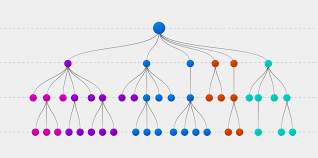

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------

Evaluation of DecisionTreeClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.82       0.28    0.27      0.27           0.59      6.32



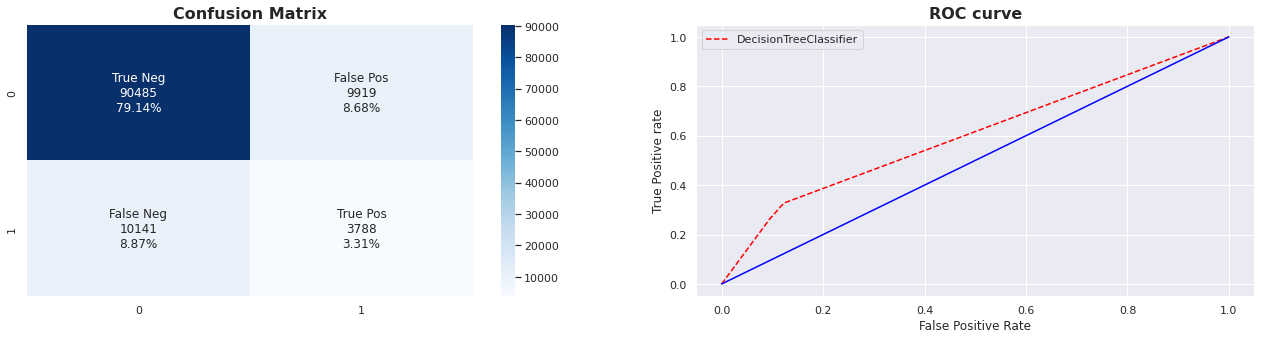

**************************************************
Best Score for DecisionTreeClassifier : 0.8797100831069444 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'best', 'random_state': 23, 'min_weight_fraction_leaf': 0.4, 'min_samples_leaf': 3, 'max_leaf_nodes': 30, 'max_features': 'sqrt', 'max_depth': 5}
--------------------------------------------------
Elapsed Time: 00:02:54

Evaluation of DecisionTreeClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.88       0.00    0.00      0.00           0.50      4.39



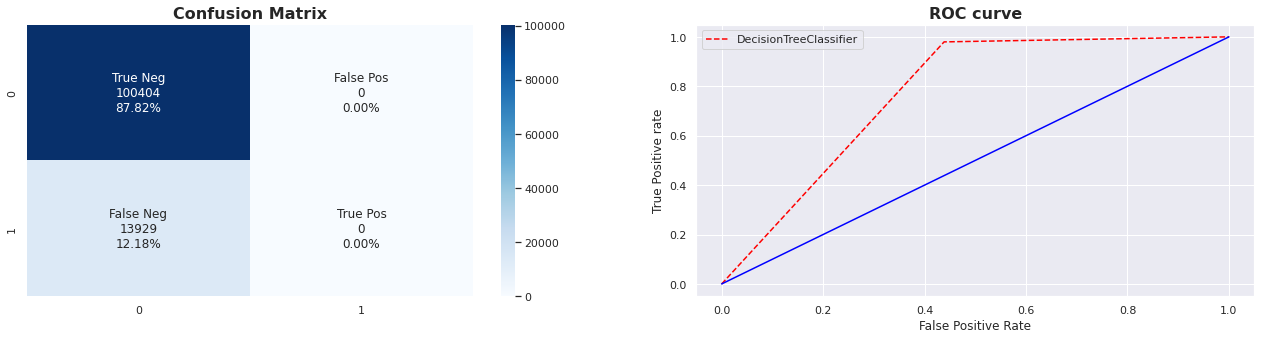

In [398]:
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}

ml_algorithm_implementation(df, DecisionTreeClassifier(), parameters_decision_tree, Tuning_Method, False)

## **Gaussian Naive Bayes**
---
Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality.

### ***Hyper-Parameter Tuning:***

> **var_smoothing:** Portion of the largest variance of all features that is added to variances for calculation stability.

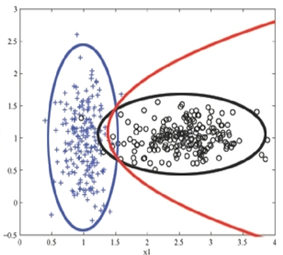

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
GaussianNB
--------------------------------------------------

Evaluation of GaussianNB before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.69       0.27    0.91      0.42           0.78     11.26



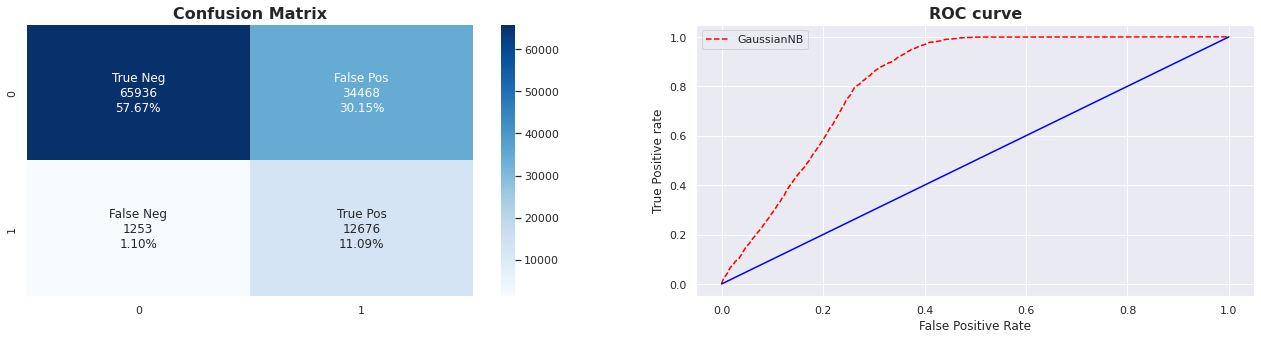

**************************************************
Best Score for GaussianNB : 0.7203130374957001 
---
Best Parameters for GaussianNB : {'var_smoothing': 1.0}
--------------------------------------------------
Elapsed Time: 00:00:15

Evaluation of GaussianNB after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.72       0.28    0.85      0.42           0.77     10.07



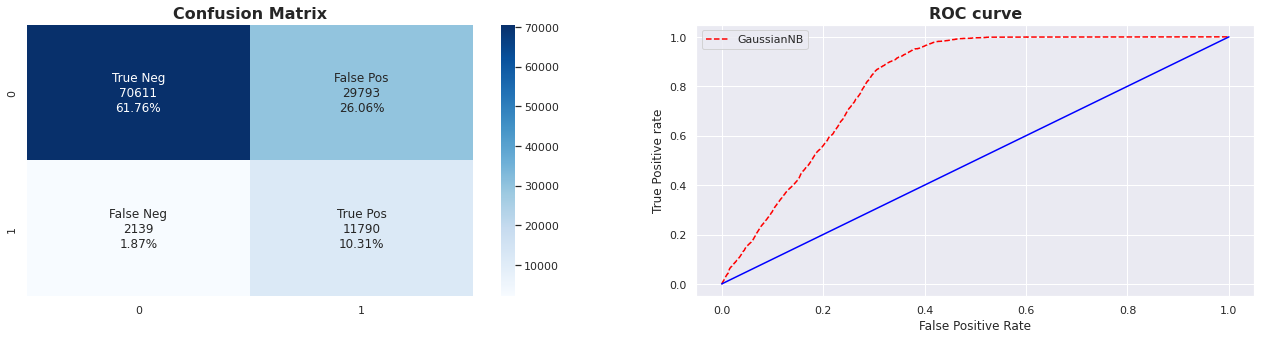

In [400]:
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

ml_algorithm_implementation(df, GaussianNB(), parameters_NB, Tuning_Method, False)

## **AdaBoost Classifier**
---
AdaBoost algorithm, short for *Adaptive Boosting*, is a *Boosting* technique used as an *Ensemble Method* in Machine Learning. It is called *Adaptive Boosting* as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

> **learning_rate:** Weight applied to each classifier at each boosting iteration.

> **random_state:** Controls the randomness of the estimator.

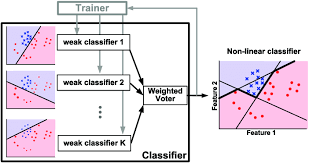

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
AdaBoostClassifier
--------------------------------------------------

Evaluation of AdaBoostClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.88       0.00    0.00      0.00           0.50      4.39



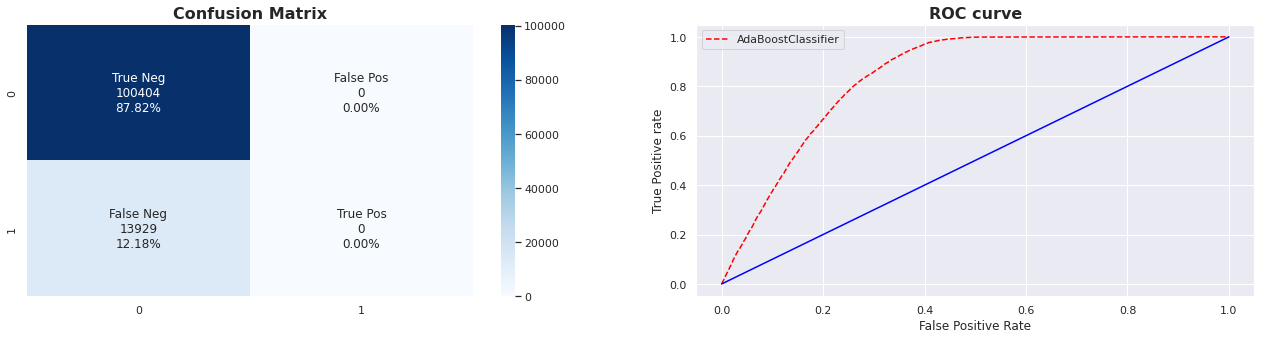

**************************************************
Best Score for AdaBoostClassifier : 0.8866666666666667 
---
Best Parameters for AdaBoostClassifier : {'random_state': 2, 'n_estimators': 10, 'learning_rate': 0.1}
--------------------------------------------------
Elapsed Time: 00:00:53

Evaluation of AdaBoostClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.88       0.00    0.00      0.00           0.50      4.39



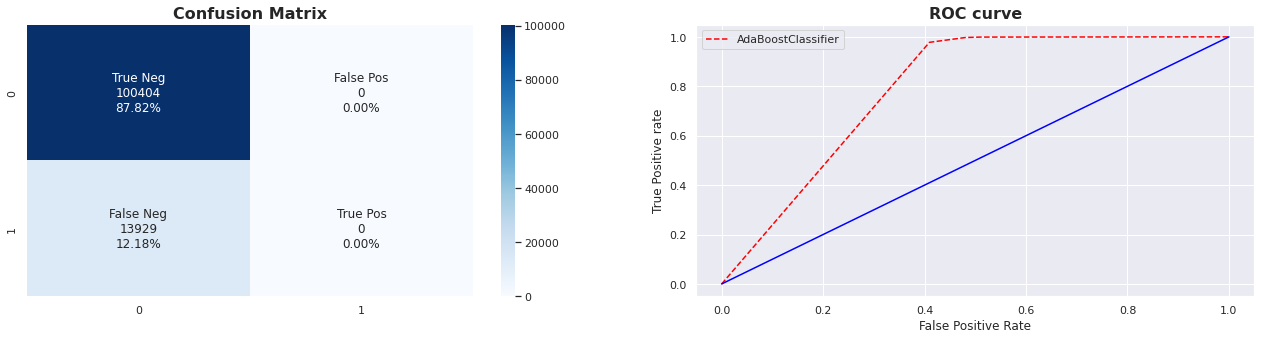

In [403]:
parameters_ada = {'n_estimators':[10, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[2]}

ml_algorithm_implementation(df, AdaBoostClassifier(), parameters_ada, Tuning_Method, False)

## **Bagging Classifier**
---
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** The maximum number of estimators at which boosting is terminated.

> **random_state:** Controls the randomness of the estimator.

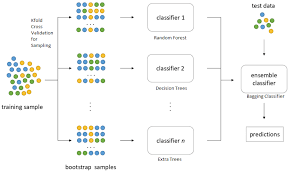

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
BaggingClassifier
--------------------------------------------------

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.85       0.30    0.15      0.20           0.55      5.29



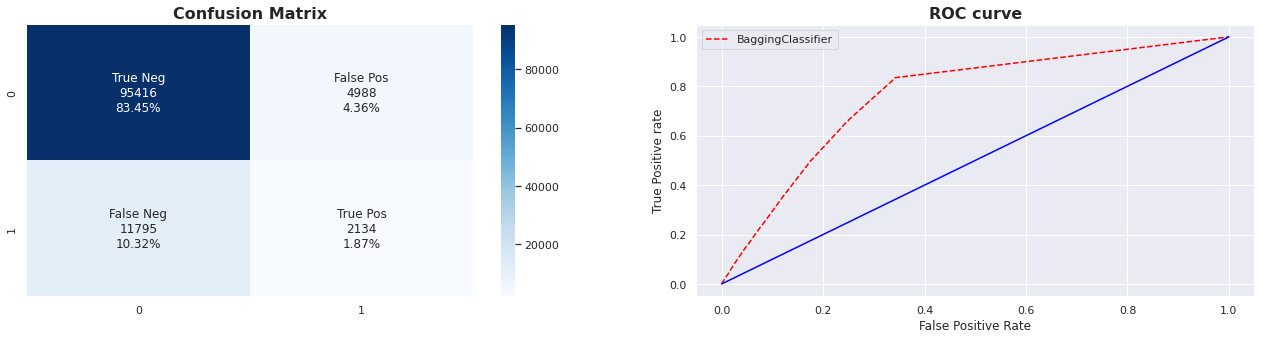

**************************************************
Best Score for BaggingClassifier : 0.7393939393939395 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 100}
--------------------------------------------------
Elapsed Time: 00:02:39

Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.86       0.31    0.16      0.21           0.55      5.21



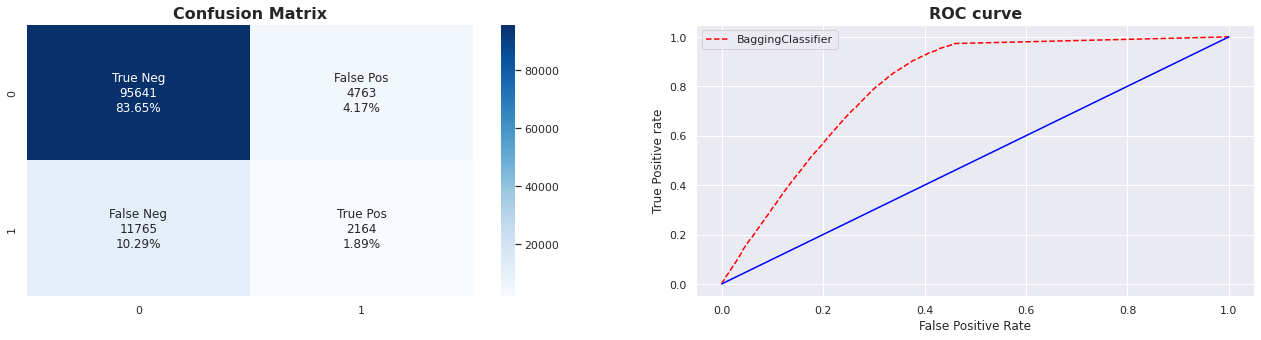

In [402]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}

ml_algorithm_implementation(df, BaggingClassifier(), parameters_bagging, Tuning_Method, False)

## **LightGBM Classifier**
---
LightGBM, short for Light Gradient Boosting Machine, is a *distributed gradient boosting framework*.It uses Histogram based splitting, Gradient-based One-Side Sampling (GOSS) ans Exclusive Feature Bundling (EFB) making it a fast algorithm.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** Number of Boosting iterations.

> **learning_rate:** This setting is used for reducing the gradient step. It affects the overall time of training: the smaller the value, the more iterations are required for training.

> **min_data_in_leaf:** Minimal number of data in one leaf. Can be used to deal with over-fitting

> **random_state:** Controls the randomness of the estimator.

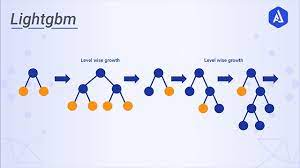

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LGBMClassifier
--------------------------------------------------

Evaluation of LGBMClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.88       0.55    0.00      0.00           0.50      4.39



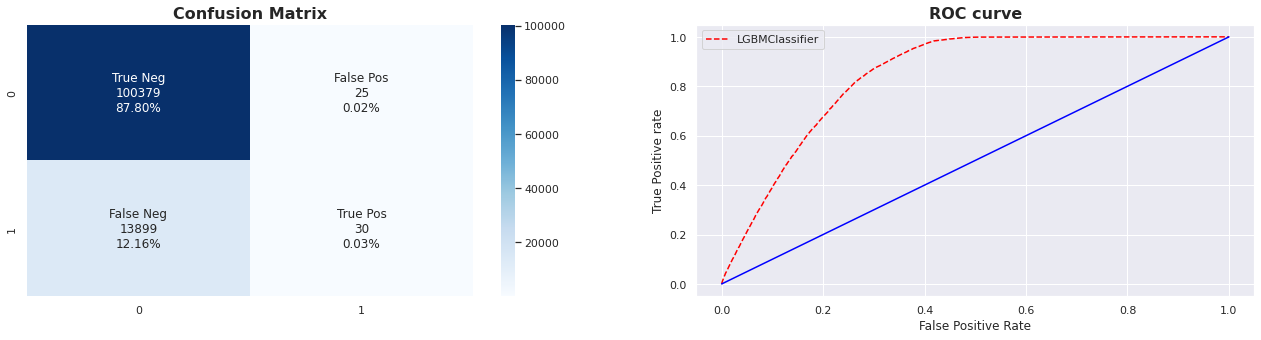

**************************************************
Best Score for LGBMClassifier : 0.8770574367010425 
---
Best Parameters for LGBMClassifier : {'n_estimators': 100, 'min_data_in_leaf': 250, 'max_depths': 3.0, 'learning_rate': 0.001}
--------------------------------------------------
Elapsed Time: 00:02:59

Evaluation of LGBMClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.88       0.00    0.00      0.00           0.50      4.39



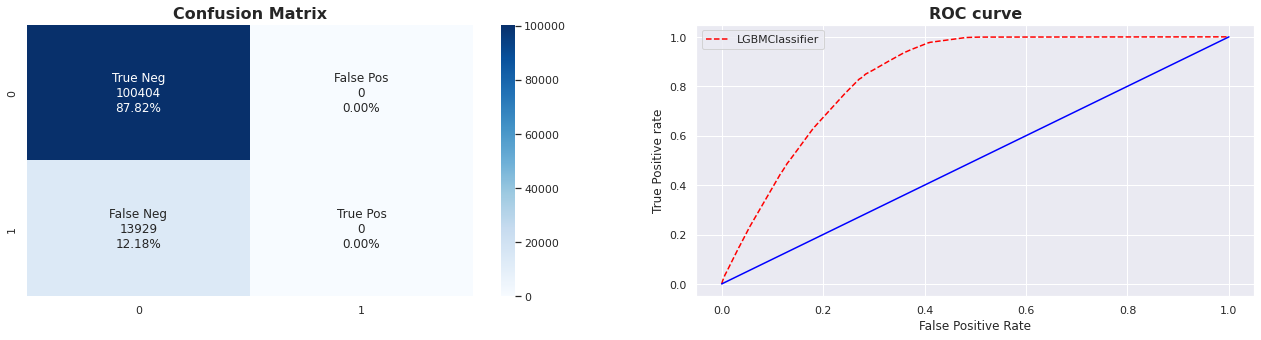

In [412]:
parameters_lightgbm = {
    'max_depths': np.linspace(1, 32, 32, endpoint=True),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[.001,0.01,.1]
}

ml_algorithm_implementation(df, lgb.LGBMClassifier(), parameters_lightgbm, Tuning_Method, False)

## **Logistic Regression**
---
The logistic classification model is a binary classification model in which the conditional probability of one of the two possible realizations of the output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

### ***Hyper-Parameter Tuning:***

> **solver:** Algorithm to use in the optimization problem.

> **penalty:** Specify the norm of the penalty.

> **C:** Inverse of regularization strength

> **random_state:** Controls the randomness of the estimator.

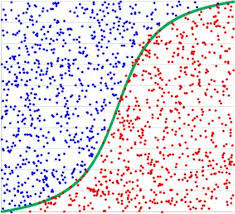


Evaluation of LogisticRegression before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.88       0.00    0.00      0.00           0.50      4.39



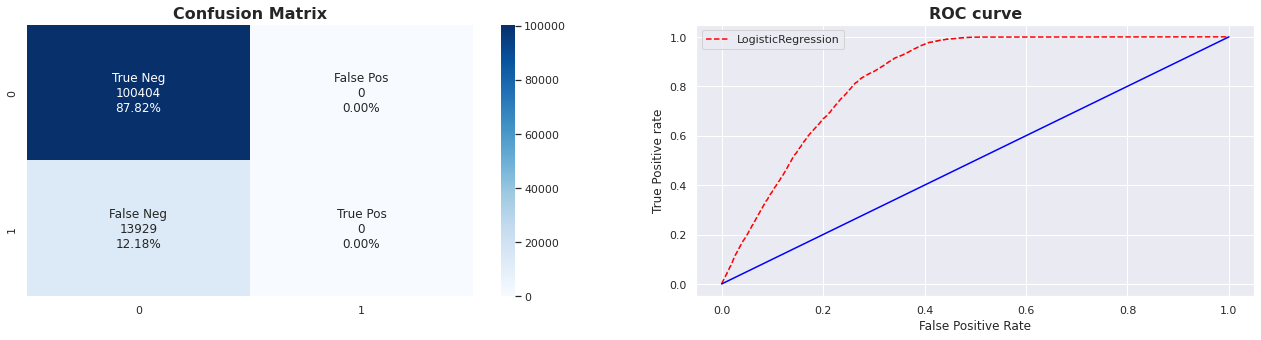

**************************************************
Best Score for LogisticRegression : 0.8675320179993078 
---
Best Parameters for LogisticRegression : {'solver': 'newton-cg', 'random_state': 2, 'penalty': 'l2', 'C': 0.01}
--------------------------------------------------
Elapsed Time: 00:00:06

Evaluation of LogisticRegression after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0            0.88       0.00    0.00      0.00           0.50      4.39



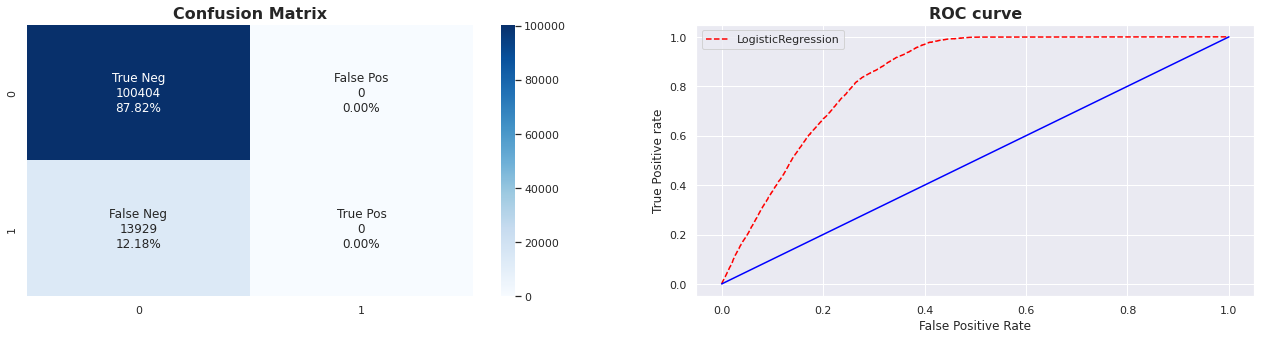

In [405]:
parameters_logistic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                       'random_state':[2]}

ml_algorithm_implementation(df, LogisticRegression(), parameters_logistic, Tuning_Method, False)

## **Best Model**
---
From all the above models that we tried to train and predict the output, we can conclude that ***Bagging Classifier*** is the best model for our data set. The best parameter of this model is {'n_estimators': 200}. Its Accuracy Score is 0.86, Precision is 0.31, Recall is 0.16, F1_Score is 0.21, ROC_AUC_Score is 0.55 and Log_Loss is 5.21. Its Elapsed time is 02 minutes and 39 seconds.

We can see that we have other models with higher Accuracy Score than *Bagging Classifier*. But the problem with those models is, their Precision and Recall values are zero which means True Positives are zero. That means those models are unable to predict correct output if any customer is ready to take vehicle insurance. And as we all know, classification accuracy alone can be misleading if you have an unequal number of observations in each class. This is exactly the case with our data set.

*Hence, **Bagging Classifier** is the **best model** for our data set.*

**NOTE:** You might get a slight difference in result every time you run because we are using *Halving_Randomized_Search_CV* to perform hyperparameter tunning which randomly selects the combination of parameters to tune the model.

# **Extracting Feature Importance**
---

We got our best model with its hyper-parameter values. Let's have a look at the feature importance of our data set.

In [410]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

def show_feature_importance():
    x_train, y_train, model = ml_algorithm_implementation(df, BaggingClassifier(n_estimators=200, random_state=23), 
                                None, None, True)
    
    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances, x_train, y_train)

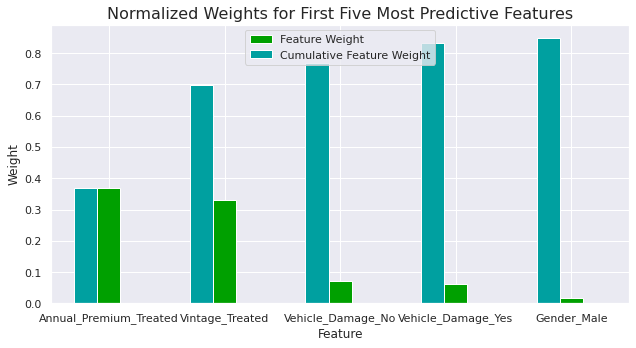

In [411]:
show_feature_importance()

**Observations:**
- Annual_Premium_Treated has impacted the most in the prediction.
- Gender_Male has highest feature weight but less cumulative weight.

# **Conclusion**
---

Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.

Through **Exploratory Data Analysis**, we categorized *Age* as YoungAge, MiddleAge, and OldAge, then we categorized the *Region_Code* as Region_A, Region_B, Region_C. We categorized the *Policy_Sales_Channel* into channel_A, channel_B, channel_C. Further, we observed that customers belonging to youngAge are more interested in vehicle response. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having  damaged vehicles are more likely to be interested in vehicle insurance.

For **Feature Selection**, we used Kendall's rank correlation coefficient for numerical features and for categorical features, we applied the Mutual Information technique. Here we observed that Previously_Insured is the most important feature and has the highest impact on the dependent feature and there is no correlation between the two numeric features

Further, we applied **Machine Learning Algorithms** to determine whether a customer would be interested in Vehicle Insurance. For the *Naive Bayes* algorithm, we got an accuracy score of 69% and after hyperparameter tuning, the accuracy score increased to 72%. Similarly, for *Decision Tree Classifier, AdaBoost, BaggingClassifier, LightGBM* accuracy score was obtained around 82%-87%. So, we selected our ***best model*** as the model with an accuracy score of ***86%*** considering precision and recall as we have an unequal number of observations in each class in our dataset, so accuracy alone can be misleading.

*That’s it! We reached the end.*
